In [1]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [2]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500
batch_size = 32

print('loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), ' train sequences')
print(len(x_test), ' test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('input_train shape: ', x_train.shape)
print('input_test shape: ', x_test.shape)


loading data...


25000  train sequences
25000  test sequences
Pad sequences (samples x time)


input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


In [6]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10


  128/20000 [..............................] - ETA: 4:41 - loss: 0.6977 - acc: 0.4453

  256/20000 [..............................] - ETA: 2:34 - loss: 0.6998 - acc: 0.4961

  384/20000 [..............................] - ETA: 1:48 - loss: 0.6984 - acc: 0.5052

  512/20000 [..............................] - ETA: 1:25 - loss: 0.6942 - acc: 0.5176

  640/20000 [..............................] - ETA: 1:11 - loss: 0.6953 - acc: 0.5125

  768/20000 [>.............................] - ETA: 1:01 - loss: 0.6943 - acc: 0.5143

  896/20000 [>.............................] - ETA: 54s - loss: 0.6945 - acc: 0.5078 

 1024/20000 [>.............................] - ETA: 49s - loss: 0.6940 - acc: 0.5215

 1152/20000 [>.............................] - ETA: 45s - loss: 0.6945 - acc: 0.5122

 1280/20000 [>.............................] - ETA: 42s - loss: 0.6933 - acc: 0.5211

 1408/20000 [=>............................] - ETA: 39s - loss: 0.6943 - acc: 0.5149

 1536/20000 [=>............................] - ETA: 37s - loss: 0.6948 - acc: 0.5137

 1664/20000 [=>............................] - ETA: 35s - loss: 0.6943 - acc: 0.5168

 1792/20000 [=>............................] - ETA: 33s - loss: 0.6948 - acc: 0.5145

 1920/20000 [=>............................] - ETA: 32s - loss: 0.6946 - acc: 0.5130

 2048/20000 [==>...........................] - ETA: 31s - loss: 0.6942 - acc: 0.5127

 2176/20000 [==>...........................] - ETA: 30s - loss: 0.6942 - acc: 0.5147

 2304/20000 [==>...........................] - ETA: 29s - loss: 0.6938 - acc: 0.5182

 2432/20000 [==>...........................] - ETA: 28s - loss: 0.6935 - acc: 0.5181

 2560/20000 [==>...........................] - ETA: 27s - loss: 0.6932 - acc: 0.5207

 2688/20000 [===>..........................] - ETA: 26s - loss: 0.6930 - acc: 0.5219

 2816/20000 [===>..........................] - ETA: 25s - loss: 0.6929 - acc: 0.5217

 2944/20000 [===>..........................] - ETA: 25s - loss: 0.6926 - acc: 0.5251

 3072/20000 [===>..........................] - ETA: 24s - loss: 0.6924 - acc: 0.5264

 3200/20000 [===>..........................] - ETA: 24s - loss: 0.6923 - acc: 0.5269

 3328/20000 [===>..........................] - ETA: 23s - loss: 0.6923 - acc: 0.5255

 3456/20000 [====>.........................] - ETA: 23s - loss: 0.6921 - acc: 0.5263

 3584/20000 [====>.........................] - ETA: 22s - loss: 0.6924 - acc: 0.5240

 3712/20000 [====>.........................] - ETA: 22s - loss: 0.6922 - acc: 0.5245

 3840/20000 [====>.........................] - ETA: 21s - loss: 0.6921 - acc: 0.5253

 3968/20000 [====>.........................] - ETA: 21s - loss: 0.6919 - acc: 0.5270

 4096/20000 [=====>........................] - ETA: 21s - loss: 0.6925 - acc: 0.5234

 4224/20000 [=====>........................] - ETA: 20s - loss: 0.6924 - acc: 0.5244

 4352/20000 [=====>........................] - ETA: 20s - loss: 0.6923 - acc: 0.5248

 4480/20000 [=====>........................] - ETA: 20s - loss: 0.6923 - acc: 0.5252

 4608/20000 [=====>........................] - ETA: 19s - loss: 0.6921 - acc: 0.5254

 4736/20000 [======>.......................] - ETA: 19s - loss: 0.6918 - acc: 0.5266

 4864/20000 [======>.......................] - ETA: 18s - loss: 0.6915 - acc: 0.5280

 4992/20000 [======>.......................] - ETA: 18s - loss: 0.6916 - acc: 0.5278

 5120/20000 [======>.......................] - ETA: 18s - loss: 0.6917 - acc: 0.5268

 5248/20000 [======>.......................] - ETA: 18s - loss: 0.6917 - acc: 0.5272

 5376/20000 [=======>......................] - ETA: 17s - loss: 0.6916 - acc: 0.5277

 5504/20000 [=======>......................] - ETA: 17s - loss: 0.6914 - acc: 0.5303

 5632/20000 [=======>......................] - ETA: 17s - loss: 0.6913 - acc: 0.5312

 5760/20000 [=======>......................] - ETA: 17s - loss: 0.6911 - acc: 0.5309

 5888/20000 [=======>......................] - ETA: 16s - loss: 0.6910 - acc: 0.5307

 6016/20000 [========>.....................] - ETA: 16s - loss: 0.6911 - acc: 0.5299

 6144/20000 [========>.....................] - ETA: 16s - loss: 0.6910 - acc: 0.5299

 6272/20000 [========>.....................] - ETA: 16s - loss: 0.6908 - acc: 0.5311

 6400/20000 [========>.....................] - ETA: 15s - loss: 0.6908 - acc: 0.5300

 6528/20000 [========>.....................] - ETA: 15s - loss: 0.6907 - acc: 0.5306

 6656/20000 [========>.....................] - ETA: 15s - loss: 0.6905 - acc: 0.5309

 6784/20000 [=========>....................] - ETA: 15s - loss: 0.6905 - acc: 0.5307

 6912/20000 [=========>....................] - ETA: 14s - loss: 0.6903 - acc: 0.5318

 7040/20000 [=========>....................] - ETA: 14s - loss: 0.6902 - acc: 0.5325

 7168/20000 [=========>....................] - ETA: 14s - loss: 0.6900 - acc: 0.5338

 7296/20000 [=========>....................] - ETA: 14s - loss: 0.6898 - acc: 0.5347

 7424/20000 [==========>...................] - ETA: 14s - loss: 0.6895 - acc: 0.5356

 7552/20000 [==========>...................] - ETA: 13s - loss: 0.6894 - acc: 0.5359

 7680/20000 [==========>...................] - ETA: 13s - loss: 0.6895 - acc: 0.5358

 7808/20000 [==========>...................] - ETA: 13s - loss: 0.6893 - acc: 0.5366

 7936/20000 [==========>...................] - ETA: 13s - loss: 0.6892 - acc: 0.5369

 8064/20000 [===========>..................] - ETA: 13s - loss: 0.6891 - acc: 0.5370

 8192/20000 [===========>..................] - ETA: 12s - loss: 0.6890 - acc: 0.5375

 8320/20000 [===========>..................] - ETA: 12s - loss: 0.6889 - acc: 0.5380

 8448/20000 [===========>..................] - ETA: 12s - loss: 0.6888 - acc: 0.5380

 8576/20000 [===========>..................] - ETA: 12s - loss: 0.6887 - acc: 0.5389

 8704/20000 [============>.................] - ETA: 12s - loss: 0.6888 - acc: 0.5381

 8832/20000 [============>.................] - ETA: 11s - loss: 0.6888 - acc: 0.5378

 8960/20000 [============>.................] - ETA: 11s - loss: 0.6884 - acc: 0.5388

 9088/20000 [============>.................] - ETA: 11s - loss: 0.6882 - acc: 0.5397

 9216/20000 [============>.................] - ETA: 11s - loss: 0.6882 - acc: 0.5396

 9344/20000 [=============>................] - ETA: 11s - loss: 0.6882 - acc: 0.5398

 9472/20000 [=============>................] - ETA: 11s - loss: 0.6880 - acc: 0.5406

 9600/20000 [=============>................] - ETA: 10s - loss: 0.6879 - acc: 0.5401

 9728/20000 [=============>................] - ETA: 10s - loss: 0.6877 - acc: 0.5413

 9856/20000 [=============>................] - ETA: 10s - loss: 0.6877 - acc: 0.5413

 9984/20000 [=============>................] - ETA: 10s - loss: 0.6874 - acc: 0.5430

10112/20000 [==============>...............] - ETA: 10s - loss: 0.6872 - acc: 0.5433

10240/20000 [==============>...............] - ETA: 10s - loss: 0.6870 - acc: 0.5441

10368/20000 [==============>...............] - ETA: 10s - loss: 0.6869 - acc: 0.5443

10496/20000 [==============>...............] - ETA: 9s - loss: 0.6868 - acc: 0.5452 

10624/20000 [==============>...............] - ETA: 9s - loss: 0.6868 - acc: 0.5450

10752/20000 [===============>..............] - ETA: 9s - loss: 0.6867 - acc: 0.5451

10880/20000 [===============>..............] - ETA: 9s - loss: 0.6866 - acc: 0.5456

11008/20000 [===============>..............] - ETA: 9s - loss: 0.6865 - acc: 0.5459

11136/20000 [===============>..............] - ETA: 9s - loss: 0.6861 - acc: 0.5471

11264/20000 [===============>..............] - ETA: 9s - loss: 0.6860 - acc: 0.5472

11392/20000 [================>.............] - ETA: 8s - loss: 0.6859 - acc: 0.5474

11520/20000 [================>.............] - ETA: 8s - loss: 0.6856 - acc: 0.5487

11648/20000 [================>.............] - ETA: 8s - loss: 0.6853 - acc: 0.5495

11776/20000 [================>.............] - ETA: 8s - loss: 0.6853 - acc: 0.5498

11904/20000 [================>.............] - ETA: 8s - loss: 0.6853 - acc: 0.5501

12032/20000 [=================>............] - ETA: 8s - loss: 0.6851 - acc: 0.5507

12160/20000 [=================>............] - ETA: 8s - loss: 0.6849 - acc: 0.5520

12288/20000 [=================>............] - ETA: 7s - loss: 0.6846 - acc: 0.5528

12416/20000 [=================>............] - ETA: 7s - loss: 0.6844 - acc: 0.5532

12544/20000 [=================>............] - ETA: 7s - loss: 0.6844 - acc: 0.5537

12672/20000 [==================>...........] - ETA: 7s - loss: 0.6841 - acc: 0.5542

12800/20000 [==================>...........] - ETA: 7s - loss: 0.6833 - acc: 0.5561

12928/20000 [==================>...........] - ETA: 7s - loss: 0.6832 - acc: 0.5564

13056/20000 [==================>...........] - ETA: 7s - loss: 0.6828 - acc: 0.5568

13184/20000 [==================>...........] - ETA: 6s - loss: 0.6824 - acc: 0.5576

13312/20000 [==================>...........] - ETA: 6s - loss: 0.6819 - acc: 0.5591

13440/20000 [===================>..........] - ETA: 6s - loss: 0.6819 - acc: 0.5589

13568/20000 [===================>..........] - ETA: 6s - loss: 0.6814 - acc: 0.5601

13696/20000 [===================>..........] - ETA: 6s - loss: 0.6809 - acc: 0.5610

13824/20000 [===================>..........] - ETA: 6s - loss: 0.6804 - acc: 0.5616

13952/20000 [===================>..........] - ETA: 6s - loss: 0.6800 - acc: 0.5620

14080/20000 [====================>.........] - ETA: 5s - loss: 0.6793 - acc: 0.5639

14208/20000 [====================>.........] - ETA: 5s - loss: 0.6784 - acc: 0.5652

14336/20000 [====================>.........] - ETA: 5s - loss: 0.6780 - acc: 0.5661

14464/20000 [====================>.........] - ETA: 5s - loss: 0.6793 - acc: 0.5653

14592/20000 [====================>.........] - ETA: 5s - loss: 0.6792 - acc: 0.5651

14720/20000 [=====================>........] - ETA: 5s - loss: 0.6781 - acc: 0.5669

14848/20000 [=====================>........] - ETA: 5s - loss: 0.6769 - acc: 0.5687

14976/20000 [=====================>........] - ETA: 4s - loss: 0.6765 - acc: 0.5692

15104/20000 [=====================>........] - ETA: 4s - loss: 0.6758 - acc: 0.5700

15232/20000 [=====================>........] - ETA: 4s - loss: 0.6750 - acc: 0.5712

15360/20000 [======================>.......] - ETA: 4s - loss: 0.6750 - acc: 0.5709

15488/20000 [======================>.......] - ETA: 4s - loss: 0.6745 - acc: 0.5716

15616/20000 [======================>.......] - ETA: 4s - loss: 0.6738 - acc: 0.5728

15744/20000 [======================>.......] - ETA: 4s - loss: 0.6730 - acc: 0.5741

15872/20000 [======================>.......] - ETA: 4s - loss: 0.6720 - acc: 0.5759

16000/20000 [=======================>......] - ETA: 3s - loss: 0.6712 - acc: 0.5769

16128/20000 [=======================>......] - ETA: 3s - loss: 0.6701 - acc: 0.5786

16256/20000 [=======================>......] - ETA: 3s - loss: 0.6690 - acc: 0.5802

16384/20000 [=======================>......] - ETA: 3s - loss: 0.6680 - acc: 0.5814

16512/20000 [=======================>......] - ETA: 3s - loss: 0.6670 - acc: 0.5828

16640/20000 [=======================>......] - ETA: 3s - loss: 0.6660 - acc: 0.5841

16768/20000 [========================>.....] - ETA: 3s - loss: 0.6651 - acc: 0.5854

16896/20000 [========================>.....] - ETA: 3s - loss: 0.6646 - acc: 0.5858

17024/20000 [========================>.....] - ETA: 2s - loss: 0.6634 - acc: 0.5875

17152/20000 [========================>.....] - ETA: 2s - loss: 0.6627 - acc: 0.5884

17280/20000 [========================>.....] - ETA: 2s - loss: 0.6619 - acc: 0.5897

17408/20000 [=========================>....] - ETA: 2s - loss: 0.6609 - acc: 0.5910

17536/20000 [=========================>....] - ETA: 2s - loss: 0.6596 - acc: 0.5927

17664/20000 [=========================>....] - ETA: 2s - loss: 0.6583 - acc: 0.5943

17792/20000 [=========================>....] - ETA: 2s - loss: 0.6578 - acc: 0.5953

17920/20000 [=========================>....] - ETA: 2s - loss: 0.6568 - acc: 0.5966

18048/20000 [==========================>...] - ETA: 1s - loss: 0.6558 - acc: 0.5979

18176/20000 [==========================>...] - ETA: 1s - loss: 0.6549 - acc: 0.5990

18304/20000 [==========================>...] - ETA: 1s - loss: 0.6539 - acc: 0.6002

18432/20000 [==========================>...] - ETA: 1s - loss: 0.6532 - acc: 0.6009

18560/20000 [==========================>...] - ETA: 1s - loss: 0.6525 - acc: 0.6022

18688/20000 [===========================>..] - ETA: 1s - loss: 0.6512 - acc: 0.6037

18816/20000 [===========================>..] - ETA: 1s - loss: 0.6503 - acc: 0.6048

18944/20000 [===========================>..] - ETA: 1s - loss: 0.6496 - acc: 0.6057

19072/20000 [===========================>..] - ETA: 0s - loss: 0.6488 - acc: 0.6066

19200/20000 [===========================>..] - ETA: 0s - loss: 0.6482 - acc: 0.6071

19328/20000 [===========================>..] - ETA: 0s - loss: 0.6475 - acc: 0.6081

19456/20000 [============================>.] - ETA: 0s - loss: 0.6466 - acc: 0.6092

19584/20000 [============================>.] - ETA: 0s - loss: 0.6458 - acc: 0.6102

19712/20000 [============================>.] - ETA: 0s - loss: 0.6448 - acc: 0.6114

19840/20000 [============================>.] - ETA: 0s - loss: 0.6437 - acc: 0.6127

19968/20000 [============================>.] - ETA: 0s - loss: 0.6426 - acc: 0.6139

20000/20000 [==============================] - 22s 1ms/step - loss: 0.6424 - acc: 0.6141 - val_loss: 0.5447 - val_acc: 0.7256


Epoch 2/10
  128/20000 [..............................] - ETA: 16s - loss: 0.5909 - acc: 0.6484

  256/20000 [..............................] - ETA: 16s - loss: 0.5322 - acc: 0.7266

  384/20000 [..............................] - ETA: 16s - loss: 0.5009 - acc: 0.7604

  512/20000 [..............................] - ETA: 16s - loss: 0.4797 - acc: 0.7754

  640/20000 [..............................] - ETA: 15s - loss: 0.4745 - acc: 0.7844

  768/20000 [>.............................] - ETA: 15s - loss: 0.4743 - acc: 0.7839

  896/20000 [>.............................] - ETA: 15s - loss: 0.4687 - acc: 0.7879

 1024/20000 [>.............................] - ETA: 15s - loss: 0.4692 - acc: 0.7871

 1152/20000 [>.............................] - ETA: 15s - loss: 0.4631 - acc: 0.7891

 1280/20000 [>.............................] - ETA: 15s - loss: 0.5125 - acc: 0.7594

 1408/20000 [=>............................] - ETA: 15s - loss: 0.5307 - acc: 0.7457

 1536/20000 [=>............................] - ETA: 15s - loss: 0.5366 - acc: 0.7376

 1664/20000 [=>............................] - ETA: 15s - loss: 0.5331 - acc: 0.7422

 1792/20000 [=>............................] - ETA: 15s - loss: 0.5249 - acc: 0.7500

 1920/20000 [=>............................] - ETA: 15s - loss: 0.5165 - acc: 0.7578

 2048/20000 [==>...........................] - ETA: 15s - loss: 0.5125 - acc: 0.7603

 2176/20000 [==>...........................] - ETA: 15s - loss: 0.5087 - acc: 0.7624

 2304/20000 [==>...........................] - ETA: 15s - loss: 0.5069 - acc: 0.7622

 2432/20000 [==>...........................] - ETA: 15s - loss: 0.5077 - acc: 0.7619

 2560/20000 [==>...........................] - ETA: 15s - loss: 0.5054 - acc: 0.7652

 2688/20000 [===>..........................] - ETA: 15s - loss: 0.5021 - acc: 0.7682

 2816/20000 [===>..........................] - ETA: 15s - loss: 0.4968 - acc: 0.7724

 2944/20000 [===>..........................] - ETA: 15s - loss: 0.4949 - acc: 0.7731

 3072/20000 [===>..........................] - ETA: 15s - loss: 0.4986 - acc: 0.7686

 3200/20000 [===>..........................] - ETA: 15s - loss: 0.4983 - acc: 0.7691

 3328/20000 [===>..........................] - ETA: 16s - loss: 0.4958 - acc: 0.7728

 3456/20000 [====>.........................] - ETA: 16s - loss: 0.4927 - acc: 0.7752

 3584/20000 [====>.........................] - ETA: 16s - loss: 0.4911 - acc: 0.7765

 3712/20000 [====>.........................] - ETA: 15s - loss: 0.4882 - acc: 0.7786

 3840/20000 [====>.........................] - ETA: 15s - loss: 0.4870 - acc: 0.7784

 3968/20000 [====>.........................] - ETA: 15s - loss: 0.4838 - acc: 0.7812

 4096/20000 [=====>........................] - ETA: 15s - loss: 0.4828 - acc: 0.7812

 4224/20000 [=====>........................] - ETA: 15s - loss: 0.4793 - acc: 0.7846

 4352/20000 [=====>........................] - ETA: 15s - loss: 0.4791 - acc: 0.7835

 4480/20000 [=====>........................] - ETA: 15s - loss: 0.4765 - acc: 0.7859

 4608/20000 [=====>........................] - ETA: 15s - loss: 0.4725 - acc: 0.7884

 4736/20000 [======>.......................] - ETA: 14s - loss: 0.4808 - acc: 0.7827

 4864/20000 [======>.......................] - ETA: 14s - loss: 0.4815 - acc: 0.7817

 4992/20000 [======>.......................] - ETA: 14s - loss: 0.4804 - acc: 0.7821

 5120/20000 [======>.......................] - ETA: 14s - loss: 0.4798 - acc: 0.7822

 5248/20000 [======>.......................] - ETA: 14s - loss: 0.4785 - acc: 0.7832

 5376/20000 [=======>......................] - ETA: 14s - loss: 0.4819 - acc: 0.7801

 5504/20000 [=======>......................] - ETA: 13s - loss: 0.4795 - acc: 0.7820

 5632/20000 [=======>......................] - ETA: 13s - loss: 0.4788 - acc: 0.7821

 5760/20000 [=======>......................] - ETA: 13s - loss: 0.4774 - acc: 0.7835

 5888/20000 [=======>......................] - ETA: 13s - loss: 0.4752 - acc: 0.7848

 6016/20000 [========>.....................] - ETA: 13s - loss: 0.4734 - acc: 0.7862

 6144/20000 [========>.....................] - ETA: 13s - loss: 0.4715 - acc: 0.7878

 6272/20000 [========>.....................] - ETA: 13s - loss: 0.4715 - acc: 0.7873

 6400/20000 [========>.....................] - ETA: 13s - loss: 0.4703 - acc: 0.7889

 6528/20000 [========>.....................] - ETA: 12s - loss: 0.4693 - acc: 0.7892

 6656/20000 [========>.....................] - ETA: 12s - loss: 0.4683 - acc: 0.7900

 6784/20000 [=========>....................] - ETA: 12s - loss: 0.4670 - acc: 0.7914

 6912/20000 [=========>....................] - ETA: 12s - loss: 0.4656 - acc: 0.7920

 7040/20000 [=========>....................] - ETA: 12s - loss: 0.4655 - acc: 0.7913

 7168/20000 [=========>....................] - ETA: 12s - loss: 0.4639 - acc: 0.7924

 7296/20000 [=========>....................] - ETA: 12s - loss: 0.4621 - acc: 0.7936

 7424/20000 [==========>...................] - ETA: 12s - loss: 0.4614 - acc: 0.7939

 7552/20000 [==========>...................] - ETA: 11s - loss: 0.4594 - acc: 0.7952

 7680/20000 [==========>...................] - ETA: 11s - loss: 0.4605 - acc: 0.7941

 7808/20000 [==========>...................] - ETA: 11s - loss: 0.4600 - acc: 0.7947

 7936/20000 [==========>...................] - ETA: 11s - loss: 0.4595 - acc: 0.7954

 8064/20000 [===========>..................] - ETA: 11s - loss: 0.4587 - acc: 0.7959

 8192/20000 [===========>..................] - ETA: 11s - loss: 0.4578 - acc: 0.7961

 8320/20000 [===========>..................] - ETA: 11s - loss: 0.4571 - acc: 0.7964

 8448/20000 [===========>..................] - ETA: 10s - loss: 0.4552 - acc: 0.7978

 8576/20000 [===========>..................] - ETA: 10s - loss: 0.4538 - acc: 0.7986

 8704/20000 [============>.................] - ETA: 10s - loss: 0.4530 - acc: 0.7996

 8832/20000 [============>.................] - ETA: 10s - loss: 0.4514 - acc: 0.8005

 8960/20000 [============>.................] - ETA: 10s - loss: 0.4503 - acc: 0.8011

 9088/20000 [============>.................] - ETA: 10s - loss: 0.4492 - acc: 0.8020

 9216/20000 [============>.................] - ETA: 10s - loss: 0.4483 - acc: 0.8020

 9344/20000 [=============>................] - ETA: 9s - loss: 0.4489 - acc: 0.8012 

 9472/20000 [=============>................] - ETA: 9s - loss: 0.4493 - acc: 0.8009

 9600/20000 [=============>................] - ETA: 9s - loss: 0.4491 - acc: 0.8009

 9728/20000 [=============>................] - ETA: 9s - loss: 0.4486 - acc: 0.8015

 9856/20000 [=============>................] - ETA: 9s - loss: 0.4482 - acc: 0.8017

 9984/20000 [=============>................] - ETA: 9s - loss: 0.4469 - acc: 0.8027

10112/20000 [==============>...............] - ETA: 9s - loss: 0.4455 - acc: 0.8034

10240/20000 [==============>...............] - ETA: 9s - loss: 0.4460 - acc: 0.8028

10368/20000 [==============>...............] - ETA: 8s - loss: 0.4463 - acc: 0.8027

10496/20000 [==============>...............] - ETA: 8s - loss: 0.4462 - acc: 0.8025

10624/20000 [==============>...............] - ETA: 8s - loss: 0.4454 - acc: 0.8027

10752/20000 [===============>..............] - ETA: 8s - loss: 0.4444 - acc: 0.8033

10880/20000 [===============>..............] - ETA: 8s - loss: 0.4442 - acc: 0.8033

11008/20000 [===============>..............] - ETA: 8s - loss: 0.4441 - acc: 0.8037

11136/20000 [===============>..............] - ETA: 8s - loss: 0.4435 - acc: 0.8040

11264/20000 [===============>..............] - ETA: 7s - loss: 0.4430 - acc: 0.8044

11392/20000 [================>.............] - ETA: 7s - loss: 0.4420 - acc: 0.8053

11520/20000 [================>.............] - ETA: 7s - loss: 0.4442 - acc: 0.8042

11648/20000 [================>.............] - ETA: 7s - loss: 0.4430 - acc: 0.8048

11776/20000 [================>.............] - ETA: 7s - loss: 0.4427 - acc: 0.8050

11904/20000 [================>.............] - ETA: 7s - loss: 0.4424 - acc: 0.8050

12032/20000 [=================>............] - ETA: 7s - loss: 0.4424 - acc: 0.8051

12160/20000 [=================>............] - ETA: 7s - loss: 0.4414 - acc: 0.8055

12288/20000 [=================>............] - ETA: 7s - loss: 0.4408 - acc: 0.8057

12416/20000 [=================>............] - ETA: 6s - loss: 0.4417 - acc: 0.8047

12544/20000 [=================>............] - ETA: 6s - loss: 0.4412 - acc: 0.8049

12672/20000 [==================>...........] - ETA: 6s - loss: 0.4403 - acc: 0.8056

12800/20000 [==================>...........] - ETA: 6s - loss: 0.4398 - acc: 0.8062

12928/20000 [==================>...........] - ETA: 6s - loss: 0.4390 - acc: 0.8066

13056/20000 [==================>...........] - ETA: 6s - loss: 0.4399 - acc: 0.8061

13184/20000 [==================>...........] - ETA: 6s - loss: 0.4392 - acc: 0.8067

13312/20000 [==================>...........] - ETA: 6s - loss: 0.4381 - acc: 0.8072

13440/20000 [===================>..........] - ETA: 5s - loss: 0.4371 - acc: 0.8077

13568/20000 [===================>..........] - ETA: 5s - loss: 0.4359 - acc: 0.8082

13696/20000 [===================>..........] - ETA: 5s - loss: 0.4354 - acc: 0.8085

13824/20000 [===================>..........] - ETA: 5s - loss: 0.4357 - acc: 0.8084

13952/20000 [===================>..........] - ETA: 5s - loss: 0.4353 - acc: 0.8086

14080/20000 [====================>.........] - ETA: 5s - loss: 0.4348 - acc: 0.8089

14208/20000 [====================>.........] - ETA: 5s - loss: 0.4350 - acc: 0.8086

14336/20000 [====================>.........] - ETA: 5s - loss: 0.4347 - acc: 0.8085

14464/20000 [====================>.........] - ETA: 4s - loss: 0.4343 - acc: 0.8086

14592/20000 [====================>.........] - ETA: 4s - loss: 0.4348 - acc: 0.8083

14720/20000 [=====================>........] - ETA: 4s - loss: 0.4348 - acc: 0.8084

14848/20000 [=====================>........] - ETA: 4s - loss: 0.4338 - acc: 0.8091

14976/20000 [=====================>........] - ETA: 4s - loss: 0.4339 - acc: 0.8088

15104/20000 [=====================>........] - ETA: 4s - loss: 0.4338 - acc: 0.8089

15232/20000 [=====================>........] - ETA: 4s - loss: 0.4334 - acc: 0.8092

15360/20000 [======================>.......] - ETA: 4s - loss: 0.4329 - acc: 0.8096

15488/20000 [======================>.......] - ETA: 4s - loss: 0.4324 - acc: 0.8100

15616/20000 [======================>.......] - ETA: 3s - loss: 0.4316 - acc: 0.8105

15744/20000 [======================>.......] - ETA: 3s - loss: 0.4313 - acc: 0.8108

15872/20000 [======================>.......] - ETA: 3s - loss: 0.4309 - acc: 0.8111

16000/20000 [=======================>......] - ETA: 3s - loss: 0.4308 - acc: 0.8112

16128/20000 [=======================>......] - ETA: 3s - loss: 0.4316 - acc: 0.8103

16256/20000 [=======================>......] - ETA: 3s - loss: 0.4314 - acc: 0.8102

16384/20000 [=======================>......] - ETA: 3s - loss: 0.4315 - acc: 0.8102

16512/20000 [=======================>......] - ETA: 3s - loss: 0.4312 - acc: 0.8106

16640/20000 [=======================>......] - ETA: 3s - loss: 0.4312 - acc: 0.8106

16768/20000 [========================>.....] - ETA: 2s - loss: 0.4314 - acc: 0.8103

16896/20000 [========================>.....] - ETA: 2s - loss: 0.4316 - acc: 0.8100

17024/20000 [========================>.....] - ETA: 2s - loss: 0.4317 - acc: 0.8102

17152/20000 [========================>.....] - ETA: 2s - loss: 0.4319 - acc: 0.8102

17280/20000 [========================>.....] - ETA: 2s - loss: 0.4318 - acc: 0.8102

17408/20000 [=========================>....] - ETA: 2s - loss: 0.4316 - acc: 0.8103

17536/20000 [=========================>....] - ETA: 2s - loss: 0.4320 - acc: 0.8099

17664/20000 [=========================>....] - ETA: 2s - loss: 0.4320 - acc: 0.8098

17792/20000 [=========================>....] - ETA: 1s - loss: 0.4315 - acc: 0.8103

17920/20000 [=========================>....] - ETA: 1s - loss: 0.4311 - acc: 0.8106

18048/20000 [==========================>...] - ETA: 1s - loss: 0.4304 - acc: 0.8112

18176/20000 [==========================>...] - ETA: 1s - loss: 0.4300 - acc: 0.8115

18304/20000 [==========================>...] - ETA: 1s - loss: 0.4298 - acc: 0.8117

18432/20000 [==========================>...] - ETA: 1s - loss: 0.4294 - acc: 0.8119

18560/20000 [==========================>...] - ETA: 1s - loss: 0.4293 - acc: 0.8120

18688/20000 [===========================>..] - ETA: 1s - loss: 0.4289 - acc: 0.8122

18816/20000 [===========================>..] - ETA: 1s - loss: 0.4281 - acc: 0.8126

18944/20000 [===========================>..] - ETA: 0s - loss: 0.4278 - acc: 0.8127

19072/20000 [===========================>..] - ETA: 0s - loss: 0.4274 - acc: 0.8130

19200/20000 [===========================>..] - ETA: 0s - loss: 0.4265 - acc: 0.8134

19328/20000 [===========================>..] - ETA: 0s - loss: 0.4259 - acc: 0.8137

19456/20000 [============================>.] - ETA: 0s - loss: 0.4264 - acc: 0.8133

19584/20000 [============================>.] - ETA: 0s - loss: 0.4264 - acc: 0.8133

19712/20000 [============================>.] - ETA: 0s - loss: 0.4255 - acc: 0.8137

19840/20000 [============================>.] - ETA: 0s - loss: 0.4251 - acc: 0.8139

19968/20000 [============================>.] - ETA: 0s - loss: 0.4241 - acc: 0.8145

20000/20000 [==============================] - 20s 977us/step - loss: 0.4237 - acc: 0.8147 - val_loss: 0.5289 - val_acc: 0.7712


Epoch 3/10
  128/20000 [..............................] - ETA: 17s - loss: 0.3747 - acc: 0.8281

  256/20000 [..............................] - ETA: 17s - loss: 0.3510 - acc: 0.8438

  384/20000 [..............................] - ETA: 16s - loss: 0.3308 - acc: 0.8594

  512/20000 [..............................] - ETA: 16s - loss: 0.3284 - acc: 0.8652

  640/20000 [..............................] - ETA: 16s - loss: 0.3180 - acc: 0.8719

  768/20000 [>.............................] - ETA: 16s - loss: 0.3089 - acc: 0.8815

  896/20000 [>.............................] - ETA: 16s - loss: 0.3012 - acc: 0.8884

 1024/20000 [>.............................] - ETA: 16s - loss: 0.2981 - acc: 0.8877

 1152/20000 [>.............................] - ETA: 15s - loss: 0.2957 - acc: 0.8889

 1280/20000 [>.............................] - ETA: 15s - loss: 0.2908 - acc: 0.8906

 1408/20000 [=>............................] - ETA: 15s - loss: 0.2934 - acc: 0.8892

 1536/20000 [=>............................] - ETA: 15s - loss: 0.2906 - acc: 0.8932

 1664/20000 [=>............................] - ETA: 15s - loss: 0.2855 - acc: 0.8960

 1792/20000 [=>............................] - ETA: 15s - loss: 0.2896 - acc: 0.8923

 1920/20000 [=>............................] - ETA: 15s - loss: 0.2868 - acc: 0.8927

 2048/20000 [==>...........................] - ETA: 15s - loss: 0.2870 - acc: 0.8921

 2176/20000 [==>...........................] - ETA: 14s - loss: 0.2872 - acc: 0.8920

 2304/20000 [==>...........................] - ETA: 14s - loss: 0.2850 - acc: 0.8924

 2432/20000 [==>...........................] - ETA: 14s - loss: 0.2832 - acc: 0.8935

 2560/20000 [==>...........................] - ETA: 14s - loss: 0.2867 - acc: 0.8902

 2688/20000 [===>..........................] - ETA: 14s - loss: 0.2842 - acc: 0.8917

 2816/20000 [===>..........................] - ETA: 14s - loss: 0.2865 - acc: 0.8896

 2944/20000 [===>..........................] - ETA: 14s - loss: 0.2868 - acc: 0.8906

 3072/20000 [===>..........................] - ETA: 14s - loss: 0.2889 - acc: 0.8893

 3200/20000 [===>..........................] - ETA: 14s - loss: 0.2884 - acc: 0.8891

 3328/20000 [===>..........................] - ETA: 14s - loss: 0.2874 - acc: 0.8894

 3456/20000 [====>.........................] - ETA: 13s - loss: 0.2851 - acc: 0.8906

 3584/20000 [====>.........................] - ETA: 13s - loss: 0.2888 - acc: 0.8887

 3712/20000 [====>.........................] - ETA: 13s - loss: 0.2877 - acc: 0.8901

 3840/20000 [====>.........................] - ETA: 13s - loss: 0.2874 - acc: 0.8901

 3968/20000 [====>.........................] - ETA: 13s - loss: 0.2941 - acc: 0.8866

 4096/20000 [=====>........................] - ETA: 13s - loss: 0.2960 - acc: 0.8857

 4224/20000 [=====>........................] - ETA: 13s - loss: 0.2934 - acc: 0.8871

 4352/20000 [=====>........................] - ETA: 13s - loss: 0.2930 - acc: 0.8869

 4480/20000 [=====>........................] - ETA: 13s - loss: 0.2922 - acc: 0.8879

 4608/20000 [=====>........................] - ETA: 12s - loss: 0.2906 - acc: 0.8889

 4736/20000 [======>.......................] - ETA: 12s - loss: 0.2925 - acc: 0.8883

 4864/20000 [======>.......................] - ETA: 12s - loss: 0.2938 - acc: 0.8869

 4992/20000 [======>.......................] - ETA: 12s - loss: 0.2952 - acc: 0.8862

 5120/20000 [======>.......................] - ETA: 12s - loss: 0.2937 - acc: 0.8867

 5248/20000 [======>.......................] - ETA: 12s - loss: 0.2952 - acc: 0.8857

 5376/20000 [=======>......................] - ETA: 12s - loss: 0.2953 - acc: 0.8860

 5504/20000 [=======>......................] - ETA: 12s - loss: 0.2943 - acc: 0.8870

 5632/20000 [=======>......................] - ETA: 12s - loss: 0.2948 - acc: 0.8867

 5760/20000 [=======>......................] - ETA: 11s - loss: 0.2938 - acc: 0.8875

 5888/20000 [=======>......................] - ETA: 11s - loss: 0.2934 - acc: 0.8876

 6016/20000 [========>.....................] - ETA: 11s - loss: 0.2946 - acc: 0.8863

 6144/20000 [========>.....................] - ETA: 11s - loss: 0.2954 - acc: 0.8861

 6272/20000 [========>.....................] - ETA: 11s - loss: 0.2955 - acc: 0.8860

 6400/20000 [========>.....................] - ETA: 11s - loss: 0.2953 - acc: 0.8855

 6528/20000 [========>.....................] - ETA: 11s - loss: 0.2954 - acc: 0.8853

 6656/20000 [========>.....................] - ETA: 11s - loss: 0.2947 - acc: 0.8857

 6784/20000 [=========>....................] - ETA: 11s - loss: 0.2949 - acc: 0.8853

 6912/20000 [=========>....................] - ETA: 10s - loss: 0.2950 - acc: 0.8853

 7040/20000 [=========>....................] - ETA: 10s - loss: 0.2941 - acc: 0.8857

 7168/20000 [=========>....................] - ETA: 10s - loss: 0.2946 - acc: 0.8848

 7296/20000 [=========>....................] - ETA: 10s - loss: 0.2962 - acc: 0.8832

 7424/20000 [==========>...................] - ETA: 10s - loss: 0.2956 - acc: 0.8831

 7552/20000 [==========>...................] - ETA: 10s - loss: 0.2960 - acc: 0.8827

 7680/20000 [==========>...................] - ETA: 10s - loss: 0.2961 - acc: 0.8823

 7808/20000 [==========>...................] - ETA: 10s - loss: 0.2956 - acc: 0.8828

 7936/20000 [==========>...................] - ETA: 10s - loss: 0.2952 - acc: 0.8829

 8064/20000 [===========>..................] - ETA: 10s - loss: 0.2942 - acc: 0.8833

 8192/20000 [===========>..................] - ETA: 9s - loss: 0.2935 - acc: 0.8837 

 8320/20000 [===========>..................] - ETA: 9s - loss: 0.2926 - acc: 0.8841

 8448/20000 [===========>..................] - ETA: 9s - loss: 0.2923 - acc: 0.8842

 8576/20000 [===========>..................] - ETA: 9s - loss: 0.2920 - acc: 0.8842

 8704/20000 [============>.................] - ETA: 9s - loss: 0.2928 - acc: 0.8833

 8832/20000 [============>.................] - ETA: 9s - loss: 0.2928 - acc: 0.8834

 8960/20000 [============>.................] - ETA: 9s - loss: 0.2951 - acc: 0.8820

 9088/20000 [============>.................] - ETA: 9s - loss: 0.2956 - acc: 0.8813

 9216/20000 [============>.................] - ETA: 9s - loss: 0.2960 - acc: 0.8812

 9344/20000 [=============>................] - ETA: 8s - loss: 0.2959 - acc: 0.8813

 9472/20000 [=============>................] - ETA: 8s - loss: 0.2949 - acc: 0.8818

 9600/20000 [=============>................] - ETA: 8s - loss: 0.2947 - acc: 0.8819

 9728/20000 [=============>................] - ETA: 8s - loss: 0.2949 - acc: 0.8817

 9856/20000 [=============>................] - ETA: 8s - loss: 0.2971 - acc: 0.8808

 9984/20000 [=============>................] - ETA: 8s - loss: 0.2967 - acc: 0.8811

10112/20000 [==============>...............] - ETA: 8s - loss: 0.2979 - acc: 0.8804

10240/20000 [==============>...............] - ETA: 8s - loss: 0.2989 - acc: 0.8799

10368/20000 [==============>...............] - ETA: 8s - loss: 0.2991 - acc: 0.8796

10496/20000 [==============>...............] - ETA: 7s - loss: 0.2985 - acc: 0.8801

10624/20000 [==============>...............] - ETA: 7s - loss: 0.2972 - acc: 0.8807

10752/20000 [===============>..............] - ETA: 7s - loss: 0.2970 - acc: 0.8810

10880/20000 [===============>..............] - ETA: 7s - loss: 0.2956 - acc: 0.8817

11008/20000 [===============>..............] - ETA: 7s - loss: 0.2947 - acc: 0.8820

11136/20000 [===============>..............] - ETA: 7s - loss: 0.2949 - acc: 0.8819

11264/20000 [===============>..............] - ETA: 7s - loss: 0.2947 - acc: 0.8819

11392/20000 [================>.............] - ETA: 7s - loss: 0.2938 - acc: 0.8825

11520/20000 [================>.............] - ETA: 7s - loss: 0.2929 - acc: 0.8830

11648/20000 [================>.............] - ETA: 7s - loss: 0.2941 - acc: 0.8822

11776/20000 [================>.............] - ETA: 6s - loss: 0.2944 - acc: 0.8823

11904/20000 [================>.............] - ETA: 6s - loss: 0.2945 - acc: 0.8821

12032/20000 [=================>............] - ETA: 6s - loss: 0.2946 - acc: 0.8822

12160/20000 [=================>............] - ETA: 6s - loss: 0.2946 - acc: 0.8824

12288/20000 [=================>............] - ETA: 6s - loss: 0.2955 - acc: 0.8820

12416/20000 [=================>............] - ETA: 6s - loss: 0.2947 - acc: 0.8825

12544/20000 [=================>............] - ETA: 6s - loss: 0.2951 - acc: 0.8821

12672/20000 [==================>...........] - ETA: 6s - loss: 0.2952 - acc: 0.8819

12800/20000 [==================>...........] - ETA: 6s - loss: 0.2952 - acc: 0.8819

12928/20000 [==================>...........] - ETA: 5s - loss: 0.2943 - acc: 0.8824

13056/20000 [==================>...........] - ETA: 5s - loss: 0.2941 - acc: 0.8824

13184/20000 [==================>...........] - ETA: 5s - loss: 0.2941 - acc: 0.8824

13312/20000 [==================>...........] - ETA: 5s - loss: 0.2943 - acc: 0.8821

13440/20000 [===================>..........] - ETA: 5s - loss: 0.2940 - acc: 0.8824

13568/20000 [===================>..........] - ETA: 5s - loss: 0.2938 - acc: 0.8828

13696/20000 [===================>..........] - ETA: 5s - loss: 0.2949 - acc: 0.8822

13824/20000 [===================>..........] - ETA: 5s - loss: 0.2943 - acc: 0.8825

13952/20000 [===================>..........] - ETA: 5s - loss: 0.2936 - acc: 0.8827

14080/20000 [====================>.........] - ETA: 4s - loss: 0.2933 - acc: 0.8832

14208/20000 [====================>.........] - ETA: 4s - loss: 0.2933 - acc: 0.8832

14336/20000 [====================>.........] - ETA: 4s - loss: 0.2927 - acc: 0.8834

14464/20000 [====================>.........] - ETA: 4s - loss: 0.2924 - acc: 0.8834

14592/20000 [====================>.........] - ETA: 4s - loss: 0.2938 - acc: 0.8826

14720/20000 [=====================>........] - ETA: 4s - loss: 0.2935 - acc: 0.8826

14848/20000 [=====================>........] - ETA: 4s - loss: 0.2928 - acc: 0.8829

14976/20000 [=====================>........] - ETA: 4s - loss: 0.2925 - acc: 0.8832

15104/20000 [=====================>........] - ETA: 4s - loss: 0.2922 - acc: 0.8831

15232/20000 [=====================>........] - ETA: 3s - loss: 0.2918 - acc: 0.8832

15360/20000 [======================>.......] - ETA: 3s - loss: 0.2916 - acc: 0.8834

15488/20000 [======================>.......] - ETA: 3s - loss: 0.2914 - acc: 0.8835

15616/20000 [======================>.......] - ETA: 3s - loss: 0.2911 - acc: 0.8838

15744/20000 [======================>.......] - ETA: 3s - loss: 0.2911 - acc: 0.8836

15872/20000 [======================>.......] - ETA: 3s - loss: 0.2910 - acc: 0.8835

16000/20000 [=======================>......] - ETA: 3s - loss: 0.2907 - acc: 0.8836

16128/20000 [=======================>......] - ETA: 3s - loss: 0.2905 - acc: 0.8837

16256/20000 [=======================>......] - ETA: 3s - loss: 0.2902 - acc: 0.8838

16384/20000 [=======================>......] - ETA: 3s - loss: 0.2902 - acc: 0.8836

16512/20000 [=======================>......] - ETA: 2s - loss: 0.2900 - acc: 0.8838

16640/20000 [=======================>......] - ETA: 2s - loss: 0.2897 - acc: 0.8841

16768/20000 [========================>.....] - ETA: 2s - loss: 0.2903 - acc: 0.8837

16896/20000 [========================>.....] - ETA: 2s - loss: 0.2902 - acc: 0.8838

17024/20000 [========================>.....] - ETA: 2s - loss: 0.2902 - acc: 0.8839

17152/20000 [========================>.....] - ETA: 2s - loss: 0.2898 - acc: 0.8840

17280/20000 [========================>.....] - ETA: 2s - loss: 0.2900 - acc: 0.8841

17408/20000 [=========================>....] - ETA: 2s - loss: 0.2904 - acc: 0.8839

17536/20000 [=========================>....] - ETA: 2s - loss: 0.2908 - acc: 0.8837

17664/20000 [=========================>....] - ETA: 1s - loss: 0.2906 - acc: 0.8838

17792/20000 [=========================>....] - ETA: 1s - loss: 0.2909 - acc: 0.8838

17920/20000 [=========================>....] - ETA: 1s - loss: 0.2912 - acc: 0.8835

18048/20000 [==========================>...] - ETA: 1s - loss: 0.2915 - acc: 0.8833

18176/20000 [==========================>...] - ETA: 1s - loss: 0.2919 - acc: 0.8831

18304/20000 [==========================>...] - ETA: 1s - loss: 0.2918 - acc: 0.8831

18432/20000 [==========================>...] - ETA: 1s - loss: 0.2918 - acc: 0.8832

18560/20000 [==========================>...] - ETA: 1s - loss: 0.2918 - acc: 0.8832

18688/20000 [===========================>..] - ETA: 1s - loss: 0.2916 - acc: 0.8831

18816/20000 [===========================>..] - ETA: 0s - loss: 0.2918 - acc: 0.8829

18944/20000 [===========================>..] - ETA: 0s - loss: 0.2918 - acc: 0.8829

19072/20000 [===========================>..] - ETA: 0s - loss: 0.2917 - acc: 0.8829

19200/20000 [===========================>..] - ETA: 0s - loss: 0.2914 - acc: 0.8831

19328/20000 [===========================>..] - ETA: 0s - loss: 0.2915 - acc: 0.8831

19456/20000 [============================>.] - ETA: 0s - loss: 0.2914 - acc: 0.8834

19584/20000 [============================>.] - ETA: 0s - loss: 0.2907 - acc: 0.8836

19712/20000 [============================>.] - ETA: 0s - loss: 0.2906 - acc: 0.8837

19840/20000 [============================>.] - ETA: 0s - loss: 0.2905 - acc: 0.8837

19968/20000 [============================>.] - ETA: 0s - loss: 0.2903 - acc: 0.8838

20000/20000 [==============================] - 19s 926us/step - loss: 0.2905 - acc: 0.8837 - val_loss: 0.3729 - val_acc: 0.8396


Epoch 4/10
  128/20000 [..............................] - ETA: 16s - loss: 0.1593 - acc: 0.9375

  256/20000 [..............................] - ETA: 16s - loss: 0.1690 - acc: 0.9375

  384/20000 [..............................] - ETA: 16s - loss: 0.2039 - acc: 0.9323

  512/20000 [..............................] - ETA: 16s - loss: 0.2149 - acc: 0.9258

  640/20000 [..............................] - ETA: 16s - loss: 0.2291 - acc: 0.9187

  768/20000 [>.............................] - ETA: 15s - loss: 0.2602 - acc: 0.8984

  896/20000 [>.............................] - ETA: 15s - loss: 0.2550 - acc: 0.9029

 1024/20000 [>.............................] - ETA: 15s - loss: 0.2440 - acc: 0.9092

 1152/20000 [>.............................] - ETA: 15s - loss: 0.2434 - acc: 0.9106

 1280/20000 [>.............................] - ETA: 15s - loss: 0.2392 - acc: 0.9117

 1408/20000 [=>............................] - ETA: 15s - loss: 0.2415 - acc: 0.9105

 1536/20000 [=>............................] - ETA: 15s - loss: 0.2408 - acc: 0.9108

 1664/20000 [=>............................] - ETA: 15s - loss: 0.2354 - acc: 0.9129

 1792/20000 [=>............................] - ETA: 15s - loss: 0.2384 - acc: 0.9113

 1920/20000 [=>............................] - ETA: 14s - loss: 0.2370 - acc: 0.9109

 2048/20000 [==>...........................] - ETA: 14s - loss: 0.2421 - acc: 0.9082

 2176/20000 [==>...........................] - ETA: 14s - loss: 0.2403 - acc: 0.9099

 2304/20000 [==>...........................] - ETA: 14s - loss: 0.2358 - acc: 0.9119

 2432/20000 [==>...........................] - ETA: 14s - loss: 0.2349 - acc: 0.9124

 2560/20000 [==>...........................] - ETA: 14s - loss: 0.2321 - acc: 0.9137

 2688/20000 [===>..........................] - ETA: 14s - loss: 0.2309 - acc: 0.9129

 2816/20000 [===>..........................] - ETA: 14s - loss: 0.2302 - acc: 0.9123

 2944/20000 [===>..........................] - ETA: 14s - loss: 0.2307 - acc: 0.9117

 3072/20000 [===>..........................] - ETA: 14s - loss: 0.2306 - acc: 0.9121

 3200/20000 [===>..........................] - ETA: 13s - loss: 0.2309 - acc: 0.9113

 3328/20000 [===>..........................] - ETA: 13s - loss: 0.2327 - acc: 0.9099

 3456/20000 [====>.........................] - ETA: 13s - loss: 0.2335 - acc: 0.9103

 3584/20000 [====>.........................] - ETA: 13s - loss: 0.2309 - acc: 0.9121

 3712/20000 [====>.........................] - ETA: 13s - loss: 0.2302 - acc: 0.9130

 3840/20000 [====>.........................] - ETA: 13s - loss: 0.2300 - acc: 0.9130

 3968/20000 [====>.........................] - ETA: 13s - loss: 0.2287 - acc: 0.9141

 4096/20000 [=====>........................] - ETA: 13s - loss: 0.2274 - acc: 0.9146

 4224/20000 [=====>........................] - ETA: 13s - loss: 0.2270 - acc: 0.9141

 4352/20000 [=====>........................] - ETA: 13s - loss: 0.2279 - acc: 0.9136

 4480/20000 [=====>........................] - ETA: 13s - loss: 0.2289 - acc: 0.9129

 4608/20000 [=====>........................] - ETA: 13s - loss: 0.2280 - acc: 0.9132

 4736/20000 [======>.......................] - ETA: 12s - loss: 0.2279 - acc: 0.9130

 4864/20000 [======>.......................] - ETA: 12s - loss: 0.2300 - acc: 0.9116

 4992/20000 [======>.......................] - ETA: 12s - loss: 0.2303 - acc: 0.9119

 5120/20000 [======>.......................] - ETA: 12s - loss: 0.2289 - acc: 0.9131

 5248/20000 [======>.......................] - ETA: 12s - loss: 0.2262 - acc: 0.9144

 5376/20000 [=======>......................] - ETA: 12s - loss: 0.2273 - acc: 0.9137

 5504/20000 [=======>......................] - ETA: 12s - loss: 0.2256 - acc: 0.9146

 5632/20000 [=======>......................] - ETA: 12s - loss: 0.2255 - acc: 0.9148

 5760/20000 [=======>......................] - ETA: 12s - loss: 0.2244 - acc: 0.9156

 5888/20000 [=======>......................] - ETA: 12s - loss: 0.2262 - acc: 0.9146

 6016/20000 [========>.....................] - ETA: 12s - loss: 0.2263 - acc: 0.9146

 6144/20000 [========>.....................] - ETA: 13s - loss: 0.2274 - acc: 0.9144

 6272/20000 [========>.....................] - ETA: 13s - loss: 0.2274 - acc: 0.9145

 6400/20000 [========>.....................] - ETA: 13s - loss: 0.2272 - acc: 0.9142

 6528/20000 [========>.....................] - ETA: 13s - loss: 0.2271 - acc: 0.9144

 6656/20000 [========>.....................] - ETA: 13s - loss: 0.2264 - acc: 0.9151

 6784/20000 [=========>....................] - ETA: 13s - loss: 0.2260 - acc: 0.9151

 6912/20000 [=========>....................] - ETA: 13s - loss: 0.2258 - acc: 0.9155

 7040/20000 [=========>....................] - ETA: 13s - loss: 0.2255 - acc: 0.9155

 7168/20000 [=========>....................] - ETA: 13s - loss: 0.2259 - acc: 0.9155

 7296/20000 [=========>....................] - ETA: 12s - loss: 0.2252 - acc: 0.9157

 7424/20000 [==========>...................] - ETA: 12s - loss: 0.2249 - acc: 0.9161

 7552/20000 [==========>...................] - ETA: 12s - loss: 0.2309 - acc: 0.9130

 7680/20000 [==========>...................] - ETA: 12s - loss: 0.2314 - acc: 0.9125

 7808/20000 [==========>...................] - ETA: 12s - loss: 0.2315 - acc: 0.9124

 7936/20000 [==========>...................] - ETA: 12s - loss: 0.2316 - acc: 0.9123

 8064/20000 [===========>..................] - ETA: 12s - loss: 0.2319 - acc: 0.9121

 8192/20000 [===========>..................] - ETA: 12s - loss: 0.2306 - acc: 0.9126

 8320/20000 [===========>..................] - ETA: 12s - loss: 0.2299 - acc: 0.9129

 8448/20000 [===========>..................] - ETA: 12s - loss: 0.2297 - acc: 0.9132

 8576/20000 [===========>..................] - ETA: 12s - loss: 0.2293 - acc: 0.9132

 8704/20000 [============>.................] - ETA: 12s - loss: 0.2289 - acc: 0.9134

 8832/20000 [============>.................] - ETA: 12s - loss: 0.2288 - acc: 0.9134

 8960/20000 [============>.................] - ETA: 12s - loss: 0.2295 - acc: 0.9129

 9088/20000 [============>.................] - ETA: 11s - loss: 0.2291 - acc: 0.9131

 9216/20000 [============>.................] - ETA: 11s - loss: 0.2286 - acc: 0.9130

 9344/20000 [=============>................] - ETA: 11s - loss: 0.2302 - acc: 0.9120

 9472/20000 [=============>................] - ETA: 11s - loss: 0.2302 - acc: 0.9123

 9600/20000 [=============>................] - ETA: 11s - loss: 0.2304 - acc: 0.9120

 9728/20000 [=============>................] - ETA: 11s - loss: 0.2306 - acc: 0.9120

 9856/20000 [=============>................] - ETA: 11s - loss: 0.2298 - acc: 0.9124

 9984/20000 [=============>................] - ETA: 10s - loss: 0.2285 - acc: 0.9132

10112/20000 [==============>...............] - ETA: 10s - loss: 0.2275 - acc: 0.9134

10240/20000 [==============>...............] - ETA: 10s - loss: 0.2268 - acc: 0.9137

10368/20000 [==============>...............] - ETA: 10s - loss: 0.2266 - acc: 0.9137

10496/20000 [==============>...............] - ETA: 10s - loss: 0.2265 - acc: 0.9136

10624/20000 [==============>...............] - ETA: 10s - loss: 0.2266 - acc: 0.9135

10752/20000 [===============>..............] - ETA: 9s - loss: 0.2283 - acc: 0.9126 

10880/20000 [===============>..............] - ETA: 9s - loss: 0.2291 - acc: 0.9121

11008/20000 [===============>..............] - ETA: 9s - loss: 0.2303 - acc: 0.9116

11136/20000 [===============>..............] - ETA: 9s - loss: 0.2310 - acc: 0.9112

11264/20000 [===============>..............] - ETA: 9s - loss: 0.2308 - acc: 0.9113

11392/20000 [================>.............] - ETA: 9s - loss: 0.2300 - acc: 0.9118

11520/20000 [================>.............] - ETA: 9s - loss: 0.2298 - acc: 0.9117

11648/20000 [================>.............] - ETA: 8s - loss: 0.2309 - acc: 0.9115

11776/20000 [================>.............] - ETA: 8s - loss: 0.2308 - acc: 0.9117

11904/20000 [================>.............] - ETA: 8s - loss: 0.2303 - acc: 0.9119

12032/20000 [=================>............] - ETA: 8s - loss: 0.2294 - acc: 0.9123

12160/20000 [=================>............] - ETA: 8s - loss: 0.2291 - acc: 0.9124

12288/20000 [=================>............] - ETA: 8s - loss: 0.2289 - acc: 0.9125

12416/20000 [=================>............] - ETA: 7s - loss: 0.2293 - acc: 0.9125

12544/20000 [=================>............] - ETA: 7s - loss: 0.2295 - acc: 0.9124

12672/20000 [==================>...........] - ETA: 7s - loss: 0.2295 - acc: 0.9126

12800/20000 [==================>...........] - ETA: 7s - loss: 0.2295 - acc: 0.9127

12928/20000 [==================>...........] - ETA: 7s - loss: 0.2294 - acc: 0.9127

13056/20000 [==================>...........] - ETA: 7s - loss: 0.2292 - acc: 0.9128

13184/20000 [==================>...........] - ETA: 7s - loss: 0.2287 - acc: 0.9130

13312/20000 [==================>...........] - ETA: 6s - loss: 0.2280 - acc: 0.9132

13440/20000 [===================>..........] - ETA: 6s - loss: 0.2276 - acc: 0.9134

13568/20000 [===================>..........] - ETA: 6s - loss: 0.2275 - acc: 0.9134

13696/20000 [===================>..........] - ETA: 6s - loss: 0.2272 - acc: 0.9133

13824/20000 [===================>..........] - ETA: 6s - loss: 0.2279 - acc: 0.9128

13952/20000 [===================>..........] - ETA: 6s - loss: 0.2299 - acc: 0.9119

14080/20000 [====================>.........] - ETA: 6s - loss: 0.2304 - acc: 0.9117

14208/20000 [====================>.........] - ETA: 6s - loss: 0.2308 - acc: 0.9116

14336/20000 [====================>.........] - ETA: 5s - loss: 0.2303 - acc: 0.9120

14464/20000 [====================>.........] - ETA: 5s - loss: 0.2302 - acc: 0.9122

14592/20000 [====================>.........] - ETA: 5s - loss: 0.2299 - acc: 0.9121

14720/20000 [=====================>........] - ETA: 5s - loss: 0.2302 - acc: 0.9118

14848/20000 [=====================>........] - ETA: 5s - loss: 0.2306 - acc: 0.9114

14976/20000 [=====================>........] - ETA: 5s - loss: 0.2307 - acc: 0.9113

15104/20000 [=====================>........] - ETA: 5s - loss: 0.2306 - acc: 0.9113

15232/20000 [=====================>........] - ETA: 4s - loss: 0.2306 - acc: 0.9112

15360/20000 [======================>.......] - ETA: 4s - loss: 0.2301 - acc: 0.9113

15488/20000 [======================>.......] - ETA: 4s - loss: 0.2301 - acc: 0.9112

15616/20000 [======================>.......] - ETA: 4s - loss: 0.2301 - acc: 0.9112

15744/20000 [======================>.......] - ETA: 4s - loss: 0.2300 - acc: 0.9112

15872/20000 [======================>.......] - ETA: 4s - loss: 0.2296 - acc: 0.9115

16000/20000 [=======================>......] - ETA: 4s - loss: 0.2290 - acc: 0.9118

16128/20000 [=======================>......] - ETA: 4s - loss: 0.2295 - acc: 0.9118

16256/20000 [=======================>......] - ETA: 3s - loss: 0.2293 - acc: 0.9118

16384/20000 [=======================>......] - ETA: 3s - loss: 0.2293 - acc: 0.9116

16512/20000 [=======================>......] - ETA: 3s - loss: 0.2296 - acc: 0.9112

16640/20000 [=======================>......] - ETA: 3s - loss: 0.2297 - acc: 0.9112

16768/20000 [========================>.....] - ETA: 3s - loss: 0.2296 - acc: 0.9111

16896/20000 [========================>.....] - ETA: 3s - loss: 0.2306 - acc: 0.9106

17024/20000 [========================>.....] - ETA: 3s - loss: 0.2307 - acc: 0.9104

17152/20000 [========================>.....] - ETA: 2s - loss: 0.2305 - acc: 0.9105

17280/20000 [========================>.....] - ETA: 2s - loss: 0.2308 - acc: 0.9103

17408/20000 [=========================>....] - ETA: 2s - loss: 0.2307 - acc: 0.9104

17536/20000 [=========================>....] - ETA: 2s - loss: 0.2302 - acc: 0.9107

17664/20000 [=========================>....] - ETA: 2s - loss: 0.2297 - acc: 0.9109

17792/20000 [=========================>....] - ETA: 2s - loss: 0.2304 - acc: 0.9107

17920/20000 [=========================>....] - ETA: 2s - loss: 0.2308 - acc: 0.9104

18048/20000 [==========================>...] - ETA: 2s - loss: 0.2312 - acc: 0.9099

18176/20000 [==========================>...] - ETA: 1s - loss: 0.2317 - acc: 0.9094

18304/20000 [==========================>...] - ETA: 1s - loss: 0.2318 - acc: 0.9093

18432/20000 [==========================>...] - ETA: 1s - loss: 0.2313 - acc: 0.9095

18560/20000 [==========================>...] - ETA: 1s - loss: 0.2310 - acc: 0.9094

18688/20000 [===========================>..] - ETA: 1s - loss: 0.2311 - acc: 0.9092

18816/20000 [===========================>..] - ETA: 1s - loss: 0.2312 - acc: 0.9092

18944/20000 [===========================>..] - ETA: 1s - loss: 0.2305 - acc: 0.9095

19072/20000 [===========================>..] - ETA: 0s - loss: 0.2302 - acc: 0.9096

19200/20000 [===========================>..] - ETA: 0s - loss: 0.2304 - acc: 0.9095

19328/20000 [===========================>..] - ETA: 0s - loss: 0.2305 - acc: 0.9094

19456/20000 [============================>.] - ETA: 0s - loss: 0.2307 - acc: 0.9093

19584/20000 [============================>.] - ETA: 0s - loss: 0.2309 - acc: 0.9091

19712/20000 [============================>.] - ETA: 0s - loss: 0.2308 - acc: 0.9092

19840/20000 [============================>.] - ETA: 0s - loss: 0.2304 - acc: 0.9093

19968/20000 [============================>.] - ETA: 0s - loss: 0.2312 - acc: 0.9089

20000/20000 [==============================] - 22s 1ms/step - loss: 0.2311 - acc: 0.9090 - val_loss: 0.3776 - val_acc: 0.8412


Epoch 5/10
  128/20000 [..............................] - ETA: 16s - loss: 0.1483 - acc: 0.9453

  256/20000 [..............................] - ETA: 16s - loss: 0.1722 - acc: 0.9414

  384/20000 [..............................] - ETA: 17s - loss: 0.1945 - acc: 0.9375

  512/20000 [..............................] - ETA: 16s - loss: 0.1617 - acc: 0.9512

  640/20000 [..............................] - ETA: 16s - loss: 0.1502 - acc: 0.9563

  768/20000 [>.............................] - ETA: 16s - loss: 0.1589 - acc: 0.9492

  896/20000 [>.............................] - ETA: 16s - loss: 0.1599 - acc: 0.9498

 1024/20000 [>.............................] - ETA: 16s - loss: 0.1595 - acc: 0.9473

 1152/20000 [>.............................] - ETA: 17s - loss: 0.1582 - acc: 0.9488

 1280/20000 [>.............................] - ETA: 17s - loss: 0.1552 - acc: 0.9516

 1408/20000 [=>............................] - ETA: 16s - loss: 0.1484 - acc: 0.9538

 1536/20000 [=>............................] - ETA: 16s - loss: 0.1469 - acc: 0.9531

 1664/20000 [=>............................] - ETA: 16s - loss: 0.1496 - acc: 0.9507

 1792/20000 [=>............................] - ETA: 16s - loss: 0.1498 - acc: 0.9520

 1920/20000 [=>............................] - ETA: 16s - loss: 0.1503 - acc: 0.9521

 2048/20000 [==>...........................] - ETA: 16s - loss: 0.1472 - acc: 0.9536

 2176/20000 [==>...........................] - ETA: 16s - loss: 0.1476 - acc: 0.9536

 2304/20000 [==>...........................] - ETA: 16s - loss: 0.1497 - acc: 0.9536

 2432/20000 [==>...........................] - ETA: 16s - loss: 0.1539 - acc: 0.9507

 2560/20000 [==>...........................] - ETA: 15s - loss: 0.1553 - acc: 0.9484

 2688/20000 [===>..........................] - ETA: 15s - loss: 0.1539 - acc: 0.9483

 2816/20000 [===>..........................] - ETA: 15s - loss: 0.1533 - acc: 0.9489

 2944/20000 [===>..........................] - ETA: 15s - loss: 0.1526 - acc: 0.9494

 3072/20000 [===>..........................] - ETA: 15s - loss: 0.1517 - acc: 0.9499

 3200/20000 [===>..........................] - ETA: 15s - loss: 0.1497 - acc: 0.9509

 3328/20000 [===>..........................] - ETA: 15s - loss: 0.1511 - acc: 0.9498

 3456/20000 [====>.........................] - ETA: 14s - loss: 0.1564 - acc: 0.9468

 3584/20000 [====>.........................] - ETA: 14s - loss: 0.1561 - acc: 0.9470

 3712/20000 [====>.........................] - ETA: 14s - loss: 0.1551 - acc: 0.9477

 3840/20000 [====>.........................] - ETA: 14s - loss: 0.1539 - acc: 0.9484

 3968/20000 [====>.........................] - ETA: 14s - loss: 0.1524 - acc: 0.9491

 4096/20000 [=====>........................] - ETA: 14s - loss: 0.1509 - acc: 0.9500

 4224/20000 [=====>........................] - ETA: 14s - loss: 0.1495 - acc: 0.9500

 4352/20000 [=====>........................] - ETA: 13s - loss: 0.1555 - acc: 0.9472

 4480/20000 [=====>........................] - ETA: 13s - loss: 0.1581 - acc: 0.9458

 4608/20000 [=====>........................] - ETA: 13s - loss: 0.1587 - acc: 0.9460

 4736/20000 [======>.......................] - ETA: 13s - loss: 0.1584 - acc: 0.9466

 4864/20000 [======>.......................] - ETA: 13s - loss: 0.1594 - acc: 0.9457

 4992/20000 [======>.......................] - ETA: 13s - loss: 0.1593 - acc: 0.9453

 5120/20000 [======>.......................] - ETA: 13s - loss: 0.1597 - acc: 0.9451

 5248/20000 [======>.......................] - ETA: 13s - loss: 0.1601 - acc: 0.9455

 5376/20000 [=======>......................] - ETA: 13s - loss: 0.1600 - acc: 0.9455

 5504/20000 [=======>......................] - ETA: 13s - loss: 0.1586 - acc: 0.9464

 5632/20000 [=======>......................] - ETA: 13s - loss: 0.1583 - acc: 0.9464

 5760/20000 [=======>......................] - ETA: 12s - loss: 0.1581 - acc: 0.9464

 5888/20000 [=======>......................] - ETA: 12s - loss: 0.1568 - acc: 0.9468

 6016/20000 [========>.....................] - ETA: 12s - loss: 0.1558 - acc: 0.9471

 6144/20000 [========>.....................] - ETA: 12s - loss: 0.1548 - acc: 0.9474

 6272/20000 [========>.....................] - ETA: 12s - loss: 0.1555 - acc: 0.9474

 6400/20000 [========>.....................] - ETA: 12s - loss: 0.1565 - acc: 0.9469

 6528/20000 [========>.....................] - ETA: 12s - loss: 0.1570 - acc: 0.9468

 6656/20000 [========>.....................] - ETA: 12s - loss: 0.1567 - acc: 0.9471

 6784/20000 [=========>....................] - ETA: 11s - loss: 0.1564 - acc: 0.9471

 6912/20000 [=========>....................] - ETA: 11s - loss: 0.1570 - acc: 0.9470

 7040/20000 [=========>....................] - ETA: 11s - loss: 0.1557 - acc: 0.9476

 7168/20000 [=========>....................] - ETA: 11s - loss: 0.1558 - acc: 0.9473

 7296/20000 [=========>....................] - ETA: 11s - loss: 0.1558 - acc: 0.9476

 7424/20000 [==========>...................] - ETA: 11s - loss: 0.1545 - acc: 0.9483

 7552/20000 [==========>...................] - ETA: 11s - loss: 0.1548 - acc: 0.9480

 7680/20000 [==========>...................] - ETA: 11s - loss: 0.1543 - acc: 0.9483

 7808/20000 [==========>...................] - ETA: 11s - loss: 0.1539 - acc: 0.9485

 7936/20000 [==========>...................] - ETA: 11s - loss: 0.1529 - acc: 0.9490

 8064/20000 [===========>..................] - ETA: 10s - loss: 0.1515 - acc: 0.9497

 8192/20000 [===========>..................] - ETA: 10s - loss: 0.1523 - acc: 0.9491

 8320/20000 [===========>..................] - ETA: 10s - loss: 0.1538 - acc: 0.9484

 8448/20000 [===========>..................] - ETA: 10s - loss: 0.1539 - acc: 0.9484

 8576/20000 [===========>..................] - ETA: 10s - loss: 0.1540 - acc: 0.9486

 8704/20000 [============>.................] - ETA: 10s - loss: 0.1543 - acc: 0.9484

 8832/20000 [============>.................] - ETA: 10s - loss: 0.1545 - acc: 0.9484

 8960/20000 [============>.................] - ETA: 10s - loss: 0.1543 - acc: 0.9483

 9088/20000 [============>.................] - ETA: 10s - loss: 0.1545 - acc: 0.9481

 9216/20000 [============>.................] - ETA: 9s - loss: 0.1548 - acc: 0.9476 

 9344/20000 [=============>................] - ETA: 9s - loss: 0.1552 - acc: 0.9472

 9472/20000 [=============>................] - ETA: 9s - loss: 0.1554 - acc: 0.9473

 9600/20000 [=============>................] - ETA: 9s - loss: 0.1550 - acc: 0.9474

 9728/20000 [=============>................] - ETA: 9s - loss: 0.1550 - acc: 0.9478

 9856/20000 [=============>................] - ETA: 9s - loss: 0.1558 - acc: 0.9472

 9984/20000 [=============>................] - ETA: 9s - loss: 0.1562 - acc: 0.9468

10112/20000 [==============>...............] - ETA: 9s - loss: 0.1566 - acc: 0.9466

10240/20000 [==============>...............] - ETA: 9s - loss: 0.1567 - acc: 0.9470

10368/20000 [==============>...............] - ETA: 8s - loss: 0.1564 - acc: 0.9473

10496/20000 [==============>...............] - ETA: 8s - loss: 0.1567 - acc: 0.9469

10624/20000 [==============>...............] - ETA: 8s - loss: 0.1572 - acc: 0.9467

10752/20000 [===============>..............] - ETA: 8s - loss: 0.1572 - acc: 0.9468

10880/20000 [===============>..............] - ETA: 8s - loss: 0.1571 - acc: 0.9469

11008/20000 [===============>..............] - ETA: 8s - loss: 0.1567 - acc: 0.9469

11136/20000 [===============>..............] - ETA: 8s - loss: 0.1583 - acc: 0.9460

11264/20000 [===============>..............] - ETA: 8s - loss: 0.1590 - acc: 0.9454

11392/20000 [================>.............] - ETA: 7s - loss: 0.1590 - acc: 0.9455

11520/20000 [================>.............] - ETA: 7s - loss: 0.1583 - acc: 0.9459

11648/20000 [================>.............] - ETA: 7s - loss: 0.1583 - acc: 0.9461

11776/20000 [================>.............] - ETA: 7s - loss: 0.1576 - acc: 0.9463

11904/20000 [================>.............] - ETA: 7s - loss: 0.1573 - acc: 0.9464

12032/20000 [=================>............] - ETA: 7s - loss: 0.1569 - acc: 0.9465

12160/20000 [=================>............] - ETA: 7s - loss: 0.1562 - acc: 0.9467

12288/20000 [=================>............] - ETA: 7s - loss: 0.1559 - acc: 0.9469

12416/20000 [=================>............] - ETA: 7s - loss: 0.1560 - acc: 0.9467

12544/20000 [=================>............] - ETA: 6s - loss: 0.1559 - acc: 0.9466

12672/20000 [==================>...........] - ETA: 6s - loss: 0.1555 - acc: 0.9467

12800/20000 [==================>...........] - ETA: 6s - loss: 0.1565 - acc: 0.9461

12928/20000 [==================>...........] - ETA: 6s - loss: 0.1567 - acc: 0.9459

13056/20000 [==================>...........] - ETA: 6s - loss: 0.1567 - acc: 0.9458

13184/20000 [==================>...........] - ETA: 6s - loss: 0.1574 - acc: 0.9452

13312/20000 [==================>...........] - ETA: 6s - loss: 0.1574 - acc: 0.9451

13440/20000 [===================>..........] - ETA: 6s - loss: 0.1573 - acc: 0.9453

13568/20000 [===================>..........] - ETA: 5s - loss: 0.1574 - acc: 0.9451

13696/20000 [===================>..........] - ETA: 5s - loss: 0.1573 - acc: 0.9451

13824/20000 [===================>..........] - ETA: 5s - loss: 0.1576 - acc: 0.9449

13952/20000 [===================>..........] - ETA: 5s - loss: 0.1575 - acc: 0.9450

14080/20000 [====================>.........] - ETA: 5s - loss: 0.1573 - acc: 0.9452

14208/20000 [====================>.........] - ETA: 5s - loss: 0.1578 - acc: 0.9450

14336/20000 [====================>.........] - ETA: 5s - loss: 0.1580 - acc: 0.9448

14464/20000 [====================>.........] - ETA: 5s - loss: 0.1577 - acc: 0.9450

14592/20000 [====================>.........] - ETA: 4s - loss: 0.1576 - acc: 0.9449

14720/20000 [=====================>........] - ETA: 4s - loss: 0.1577 - acc: 0.9447

14848/20000 [=====================>........] - ETA: 4s - loss: 0.1588 - acc: 0.9442

14976/20000 [=====================>........] - ETA: 4s - loss: 0.1584 - acc: 0.9444

15104/20000 [=====================>........] - ETA: 4s - loss: 0.1588 - acc: 0.9442

15232/20000 [=====================>........] - ETA: 4s - loss: 0.1591 - acc: 0.9441

15360/20000 [======================>.......] - ETA: 4s - loss: 0.1594 - acc: 0.9439

15488/20000 [======================>.......] - ETA: 4s - loss: 0.1599 - acc: 0.9436

15616/20000 [======================>.......] - ETA: 4s - loss: 0.1603 - acc: 0.9433

15744/20000 [======================>.......] - ETA: 3s - loss: 0.1608 - acc: 0.9430

15872/20000 [======================>.......] - ETA: 3s - loss: 0.1608 - acc: 0.9431

16000/20000 [=======================>......] - ETA: 3s - loss: 0.1616 - acc: 0.9428

16128/20000 [=======================>......] - ETA: 3s - loss: 0.1614 - acc: 0.9430

16256/20000 [=======================>......] - ETA: 3s - loss: 0.1611 - acc: 0.9430

16384/20000 [=======================>......] - ETA: 3s - loss: 0.1640 - acc: 0.9420

16512/20000 [=======================>......] - ETA: 3s - loss: 0.1672 - acc: 0.9407

16640/20000 [=======================>......] - ETA: 3s - loss: 0.1671 - acc: 0.9407

16768/20000 [========================>.....] - ETA: 2s - loss: 0.1676 - acc: 0.9405

16896/20000 [========================>.....] - ETA: 2s - loss: 0.1681 - acc: 0.9403

17024/20000 [========================>.....] - ETA: 2s - loss: 0.1679 - acc: 0.9404

17152/20000 [========================>.....] - ETA: 2s - loss: 0.1680 - acc: 0.9404

17280/20000 [========================>.....] - ETA: 2s - loss: 0.1678 - acc: 0.9403

17408/20000 [=========================>....] - ETA: 2s - loss: 0.1679 - acc: 0.9403

17536/20000 [=========================>....] - ETA: 2s - loss: 0.1680 - acc: 0.9401

17664/20000 [=========================>....] - ETA: 2s - loss: 0.1675 - acc: 0.9403

17792/20000 [=========================>....] - ETA: 2s - loss: 0.1672 - acc: 0.9404

17920/20000 [=========================>....] - ETA: 1s - loss: 0.1667 - acc: 0.9406

18048/20000 [==========================>...] - ETA: 1s - loss: 0.1667 - acc: 0.9405

18176/20000 [==========================>...] - ETA: 1s - loss: 0.1664 - acc: 0.9406

18304/20000 [==========================>...] - ETA: 1s - loss: 0.1661 - acc: 0.9408

18432/20000 [==========================>...] - ETA: 1s - loss: 0.1658 - acc: 0.9410

18560/20000 [==========================>...] - ETA: 1s - loss: 0.1655 - acc: 0.9411

18688/20000 [===========================>..] - ETA: 1s - loss: 0.1652 - acc: 0.9412

18816/20000 [===========================>..] - ETA: 1s - loss: 0.1648 - acc: 0.9414

18944/20000 [===========================>..] - ETA: 0s - loss: 0.1644 - acc: 0.9416

19072/20000 [===========================>..] - ETA: 0s - loss: 0.1644 - acc: 0.9416

19200/20000 [===========================>..] - ETA: 0s - loss: 0.1642 - acc: 0.9417

19328/20000 [===========================>..] - ETA: 0s - loss: 0.1638 - acc: 0.9418

19456/20000 [============================>.] - ETA: 0s - loss: 0.1642 - acc: 0.9416

19584/20000 [============================>.] - ETA: 0s - loss: 0.1642 - acc: 0.9416

19712/20000 [============================>.] - ETA: 0s - loss: 0.1641 - acc: 0.9416

19840/20000 [============================>.] - ETA: 0s - loss: 0.1639 - acc: 0.9417

19968/20000 [============================>.] - ETA: 0s - loss: 0.1639 - acc: 0.9416

20000/20000 [==============================] - 20s 1ms/step - loss: 0.1637 - acc: 0.9416 - val_loss: 0.4036 - val_acc: 0.8562


Epoch 6/10
  128/20000 [..............................] - ETA: 17s - loss: 0.0911 - acc: 0.9766

  256/20000 [..............................] - ETA: 18s - loss: 0.0921 - acc: 0.9766

  384/20000 [..............................] - ETA: 18s - loss: 0.0843 - acc: 0.9792

  512/20000 [..............................] - ETA: 17s - loss: 0.0816 - acc: 0.9785

  640/20000 [..............................] - ETA: 17s - loss: 0.0801 - acc: 0.9750

  768/20000 [>.............................] - ETA: 17s - loss: 0.0735 - acc: 0.9792

  896/20000 [>.............................] - ETA: 17s - loss: 0.0749 - acc: 0.9777

 1024/20000 [>.............................] - ETA: 17s - loss: 0.0753 - acc: 0.9785

 1152/20000 [>.............................] - ETA: 17s - loss: 0.0761 - acc: 0.9757

 1280/20000 [>.............................] - ETA: 16s - loss: 0.0765 - acc: 0.9758

 1408/20000 [=>............................] - ETA: 16s - loss: 0.0794 - acc: 0.9751

 1536/20000 [=>............................] - ETA: 16s - loss: 0.0820 - acc: 0.9746

 1664/20000 [=>............................] - ETA: 16s - loss: 0.0813 - acc: 0.9748

 1792/20000 [=>............................] - ETA: 16s - loss: 0.0866 - acc: 0.9721

 1920/20000 [=>............................] - ETA: 16s - loss: 0.0874 - acc: 0.9719

 2048/20000 [==>...........................] - ETA: 16s - loss: 0.0897 - acc: 0.9717

 2176/20000 [==>...........................] - ETA: 16s - loss: 0.0907 - acc: 0.9715

 2304/20000 [==>...........................] - ETA: 16s - loss: 0.0893 - acc: 0.9722

 2432/20000 [==>...........................] - ETA: 16s - loss: 0.0896 - acc: 0.9725

 2560/20000 [==>...........................] - ETA: 15s - loss: 0.0921 - acc: 0.9723

 2688/20000 [===>..........................] - ETA: 15s - loss: 0.0919 - acc: 0.9725

 2816/20000 [===>..........................] - ETA: 16s - loss: 0.0949 - acc: 0.9705

 2944/20000 [===>..........................] - ETA: 15s - loss: 0.0978 - acc: 0.9694

 3072/20000 [===>..........................] - ETA: 15s - loss: 0.0996 - acc: 0.9691

 3200/20000 [===>..........................] - ETA: 15s - loss: 0.1012 - acc: 0.9684

 3328/20000 [===>..........................] - ETA: 15s - loss: 0.1002 - acc: 0.9691

 3456/20000 [====>.........................] - ETA: 15s - loss: 0.1003 - acc: 0.9685

 3584/20000 [====>.........................] - ETA: 15s - loss: 0.1000 - acc: 0.9682

 3712/20000 [====>.........................] - ETA: 15s - loss: 0.0997 - acc: 0.9677

 3840/20000 [====>.........................] - ETA: 14s - loss: 0.0988 - acc: 0.9685

 3968/20000 [====>.........................] - ETA: 14s - loss: 0.0996 - acc: 0.9675

 4096/20000 [=====>........................] - ETA: 14s - loss: 0.1012 - acc: 0.9668

 4224/20000 [=====>........................] - ETA: 14s - loss: 0.1027 - acc: 0.9664

 4352/20000 [=====>........................] - ETA: 14s - loss: 0.1031 - acc: 0.9665

 4480/20000 [=====>........................] - ETA: 14s - loss: 0.1040 - acc: 0.9663

 4608/20000 [=====>........................] - ETA: 14s - loss: 0.1033 - acc: 0.9668

 4736/20000 [======>.......................] - ETA: 14s - loss: 0.1023 - acc: 0.9673

 4864/20000 [======>.......................] - ETA: 14s - loss: 0.1019 - acc: 0.9675

 4992/20000 [======>.......................] - ETA: 14s - loss: 0.1017 - acc: 0.9675

 5120/20000 [======>.......................] - ETA: 14s - loss: 0.1042 - acc: 0.9668

 5248/20000 [======>.......................] - ETA: 14s - loss: 0.1047 - acc: 0.9665

 5376/20000 [=======>......................] - ETA: 13s - loss: 0.1037 - acc: 0.9667

 5504/20000 [=======>......................] - ETA: 13s - loss: 0.1041 - acc: 0.9668

 5632/20000 [=======>......................] - ETA: 13s - loss: 0.1040 - acc: 0.9668

 5760/20000 [=======>......................] - ETA: 13s - loss: 0.1040 - acc: 0.9668

 5888/20000 [=======>......................] - ETA: 13s - loss: 0.1039 - acc: 0.9669

 6016/20000 [========>.....................] - ETA: 13s - loss: 0.1042 - acc: 0.9668

 6144/20000 [========>.....................] - ETA: 13s - loss: 0.1039 - acc: 0.9671

 6272/20000 [========>.....................] - ETA: 12s - loss: 0.1042 - acc: 0.9667

 6400/20000 [========>.....................] - ETA: 12s - loss: 0.1067 - acc: 0.9658

 6528/20000 [========>.....................] - ETA: 12s - loss: 0.1069 - acc: 0.9658

 6656/20000 [========>.....................] - ETA: 12s - loss: 0.1066 - acc: 0.9657

 6784/20000 [=========>....................] - ETA: 12s - loss: 0.1061 - acc: 0.9657

 6912/20000 [=========>....................] - ETA: 12s - loss: 0.1058 - acc: 0.9657

 7040/20000 [=========>....................] - ETA: 12s - loss: 0.1055 - acc: 0.9658

 7168/20000 [=========>....................] - ETA: 12s - loss: 0.1050 - acc: 0.9661

 7296/20000 [=========>....................] - ETA: 11s - loss: 0.1068 - acc: 0.9648

 7424/20000 [==========>...................] - ETA: 11s - loss: 0.1078 - acc: 0.9642

 7552/20000 [==========>...................] - ETA: 11s - loss: 0.1082 - acc: 0.9644

 7680/20000 [==========>...................] - ETA: 11s - loss: 0.1089 - acc: 0.9638

 7808/20000 [==========>...................] - ETA: 11s - loss: 0.1087 - acc: 0.9641

 7936/20000 [==========>...................] - ETA: 11s - loss: 0.1087 - acc: 0.9641

 8064/20000 [===========>..................] - ETA: 11s - loss: 0.1083 - acc: 0.9643

 8192/20000 [===========>..................] - ETA: 11s - loss: 0.1082 - acc: 0.9642

 8320/20000 [===========>..................] - ETA: 10s - loss: 0.1080 - acc: 0.9642

 8448/20000 [===========>..................] - ETA: 10s - loss: 0.1079 - acc: 0.9641

 8576/20000 [===========>..................] - ETA: 10s - loss: 0.1073 - acc: 0.9643

 8704/20000 [============>.................] - ETA: 10s - loss: 0.1075 - acc: 0.9642

 8832/20000 [============>.................] - ETA: 10s - loss: 0.1079 - acc: 0.9639

 8960/20000 [============>.................] - ETA: 10s - loss: 0.1077 - acc: 0.9640

 9088/20000 [============>.................] - ETA: 10s - loss: 0.1078 - acc: 0.9639

 9216/20000 [============>.................] - ETA: 10s - loss: 0.1074 - acc: 0.9640

 9344/20000 [=============>................] - ETA: 10s - loss: 0.1072 - acc: 0.9641

 9472/20000 [=============>................] - ETA: 9s - loss: 0.1069 - acc: 0.9644 

 9600/20000 [=============>................] - ETA: 9s - loss: 0.1065 - acc: 0.9646

 9728/20000 [=============>................] - ETA: 9s - loss: 0.1064 - acc: 0.9646

 9856/20000 [=============>................] - ETA: 9s - loss: 0.1065 - acc: 0.9645

 9984/20000 [=============>................] - ETA: 9s - loss: 0.1061 - acc: 0.9646

10112/20000 [==============>...............] - ETA: 9s - loss: 0.1059 - acc: 0.9648

10240/20000 [==============>...............] - ETA: 9s - loss: 0.1055 - acc: 0.9651

10368/20000 [==============>...............] - ETA: 9s - loss: 0.1056 - acc: 0.9650

10496/20000 [==============>...............] - ETA: 9s - loss: 0.1062 - acc: 0.9647

10624/20000 [==============>...............] - ETA: 9s - loss: 0.1066 - acc: 0.9646

10752/20000 [===============>..............] - ETA: 9s - loss: 0.1066 - acc: 0.9646

10880/20000 [===============>..............] - ETA: 9s - loss: 0.1065 - acc: 0.9646

11008/20000 [===============>..............] - ETA: 8s - loss: 0.1061 - acc: 0.9648

11136/20000 [===============>..............] - ETA: 8s - loss: 0.1061 - acc: 0.9648

11264/20000 [===============>..............] - ETA: 8s - loss: 0.1067 - acc: 0.9644

11392/20000 [================>.............] - ETA: 8s - loss: 0.1071 - acc: 0.9644

11520/20000 [================>.............] - ETA: 8s - loss: 0.1070 - acc: 0.9646

11648/20000 [================>.............] - ETA: 8s - loss: 0.1072 - acc: 0.9643

11776/20000 [================>.............] - ETA: 8s - loss: 0.1071 - acc: 0.9643

11904/20000 [================>.............] - ETA: 8s - loss: 0.1068 - acc: 0.9645

12032/20000 [=================>............] - ETA: 8s - loss: 0.1063 - acc: 0.9647

12160/20000 [=================>............] - ETA: 7s - loss: 0.1057 - acc: 0.9650

12288/20000 [=================>............] - ETA: 7s - loss: 0.1053 - acc: 0.9649

12416/20000 [=================>............] - ETA: 7s - loss: 0.1058 - acc: 0.9648

12544/20000 [=================>............] - ETA: 7s - loss: 0.1054 - acc: 0.9650

12672/20000 [==================>...........] - ETA: 7s - loss: 0.1051 - acc: 0.9652

12800/20000 [==================>...........] - ETA: 7s - loss: 0.1049 - acc: 0.9653

12928/20000 [==================>...........] - ETA: 7s - loss: 0.1050 - acc: 0.9652

13056/20000 [==================>...........] - ETA: 7s - loss: 0.1049 - acc: 0.9652

13184/20000 [==================>...........] - ETA: 6s - loss: 0.1046 - acc: 0.9652

13312/20000 [==================>...........] - ETA: 6s - loss: 0.1043 - acc: 0.9654

13440/20000 [===================>..........] - ETA: 6s - loss: 0.1046 - acc: 0.9653

13568/20000 [===================>..........] - ETA: 6s - loss: 0.1044 - acc: 0.9654

13696/20000 [===================>..........] - ETA: 6s - loss: 0.1039 - acc: 0.9655

13824/20000 [===================>..........] - ETA: 6s - loss: 0.1043 - acc: 0.9654

13952/20000 [===================>..........] - ETA: 6s - loss: 0.1040 - acc: 0.9655

14080/20000 [====================>.........] - ETA: 5s - loss: 0.1040 - acc: 0.9656

14208/20000 [====================>.........] - ETA: 5s - loss: 0.1045 - acc: 0.9655

14336/20000 [====================>.........] - ETA: 5s - loss: 0.1049 - acc: 0.9653

14464/20000 [====================>.........] - ETA: 5s - loss: 0.1058 - acc: 0.9647

14592/20000 [====================>.........] - ETA: 5s - loss: 0.1062 - acc: 0.9646

14720/20000 [=====================>........] - ETA: 5s - loss: 0.1061 - acc: 0.9645

14848/20000 [=====================>........] - ETA: 5s - loss: 0.1059 - acc: 0.9646

14976/20000 [=====================>........] - ETA: 5s - loss: 0.1058 - acc: 0.9647

15104/20000 [=====================>........] - ETA: 4s - loss: 0.1056 - acc: 0.9646

15232/20000 [=====================>........] - ETA: 4s - loss: 0.1060 - acc: 0.9644

15360/20000 [======================>.......] - ETA: 4s - loss: 0.1057 - acc: 0.9644

15488/20000 [======================>.......] - ETA: 4s - loss: 0.1056 - acc: 0.9644

15616/20000 [======================>.......] - ETA: 4s - loss: 0.1056 - acc: 0.9643

15744/20000 [======================>.......] - ETA: 4s - loss: 0.1063 - acc: 0.9640

15872/20000 [======================>.......] - ETA: 4s - loss: 0.1072 - acc: 0.9636

16000/20000 [=======================>......] - ETA: 4s - loss: 0.1073 - acc: 0.9636

16128/20000 [=======================>......] - ETA: 3s - loss: 0.1070 - acc: 0.9637

16256/20000 [=======================>......] - ETA: 3s - loss: 0.1066 - acc: 0.9639

16384/20000 [=======================>......] - ETA: 3s - loss: 0.1066 - acc: 0.9639

16512/20000 [=======================>......] - ETA: 3s - loss: 0.1065 - acc: 0.9638

16640/20000 [=======================>......] - ETA: 3s - loss: 0.1066 - acc: 0.9638

16768/20000 [========================>.....] - ETA: 3s - loss: 0.1072 - acc: 0.9635

16896/20000 [========================>.....] - ETA: 3s - loss: 0.1068 - acc: 0.9637

17024/20000 [========================>.....] - ETA: 2s - loss: 0.1067 - acc: 0.9636

17152/20000 [========================>.....] - ETA: 2s - loss: 0.1067 - acc: 0.9637

17280/20000 [========================>.....] - ETA: 2s - loss: 0.1067 - acc: 0.9636

17408/20000 [=========================>....] - ETA: 2s - loss: 0.1067 - acc: 0.9636

17536/20000 [=========================>....] - ETA: 2s - loss: 0.1070 - acc: 0.9635

17664/20000 [=========================>....] - ETA: 2s - loss: 0.1069 - acc: 0.9637

17792/20000 [=========================>....] - ETA: 2s - loss: 0.1073 - acc: 0.9634

17920/20000 [=========================>....] - ETA: 2s - loss: 0.1073 - acc: 0.9633

18048/20000 [==========================>...] - ETA: 1s - loss: 0.1071 - acc: 0.9634

18176/20000 [==========================>...] - ETA: 1s - loss: 0.1072 - acc: 0.9634

18304/20000 [==========================>...] - ETA: 1s - loss: 0.1073 - acc: 0.9633

18432/20000 [==========================>...] - ETA: 1s - loss: 0.1072 - acc: 0.9633

18560/20000 [==========================>...] - ETA: 1s - loss: 0.1075 - acc: 0.9632

18688/20000 [===========================>..] - ETA: 1s - loss: 0.1080 - acc: 0.9631

18816/20000 [===========================>..] - ETA: 1s - loss: 0.1085 - acc: 0.9629

18944/20000 [===========================>..] - ETA: 1s - loss: 0.1090 - acc: 0.9626

19072/20000 [===========================>..] - ETA: 0s - loss: 0.1104 - acc: 0.9619

19200/20000 [===========================>..] - ETA: 0s - loss: 0.1108 - acc: 0.9618

19328/20000 [===========================>..] - ETA: 0s - loss: 0.1109 - acc: 0.9618

19456/20000 [============================>.] - ETA: 0s - loss: 0.1111 - acc: 0.9617

19584/20000 [============================>.] - ETA: 0s - loss: 0.1110 - acc: 0.9617

19712/20000 [============================>.] - ETA: 0s - loss: 0.1109 - acc: 0.9617

19840/20000 [============================>.] - ETA: 0s - loss: 0.1110 - acc: 0.9617

19968/20000 [============================>.] - ETA: 0s - loss: 0.1114 - acc: 0.9614

20000/20000 [==============================] - 22s 1ms/step - loss: 0.1113 - acc: 0.9615 - val_loss: 0.4032 - val_acc: 0.8564


Epoch 7/10
  128/20000 [..............................] - ETA: 25s - loss: 0.0707 - acc: 0.9766

  256/20000 [..............................] - ETA: 25s - loss: 0.0606 - acc: 0.9805

  384/20000 [..............................] - ETA: 24s - loss: 0.0511 - acc: 0.9870

  512/20000 [..............................] - ETA: 22s - loss: 0.0462 - acc: 0.9883

  640/20000 [..............................] - ETA: 21s - loss: 0.0472 - acc: 0.9875

  768/20000 [>.............................] - ETA: 20s - loss: 0.0471 - acc: 0.9857

  896/20000 [>.............................] - ETA: 20s - loss: 0.0551 - acc: 0.9833

 1024/20000 [>.............................] - ETA: 19s - loss: 0.0572 - acc: 0.9844

 1152/20000 [>.............................] - ETA: 19s - loss: 0.0563 - acc: 0.9852

 1280/20000 [>.............................] - ETA: 19s - loss: 0.0552 - acc: 0.9859

 1408/20000 [=>............................] - ETA: 18s - loss: 0.0549 - acc: 0.9844

 1536/20000 [=>............................] - ETA: 18s - loss: 0.0540 - acc: 0.9850

 1664/20000 [=>............................] - ETA: 17s - loss: 0.0522 - acc: 0.9856

 1792/20000 [=>............................] - ETA: 18s - loss: 0.0524 - acc: 0.9855

 1920/20000 [=>............................] - ETA: 17s - loss: 0.0520 - acc: 0.9859

 2048/20000 [==>...........................] - ETA: 17s - loss: 0.0521 - acc: 0.9858

 2176/20000 [==>...........................] - ETA: 17s - loss: 0.0515 - acc: 0.9862

 2304/20000 [==>...........................] - ETA: 17s - loss: 0.0509 - acc: 0.9865

 2432/20000 [==>...........................] - ETA: 16s - loss: 0.0505 - acc: 0.9868

 2560/20000 [==>...........................] - ETA: 16s - loss: 0.0508 - acc: 0.9867

 2688/20000 [===>..........................] - ETA: 16s - loss: 0.0499 - acc: 0.9870

 2816/20000 [===>..........................] - ETA: 16s - loss: 0.0502 - acc: 0.9865

 2944/20000 [===>..........................] - ETA: 16s - loss: 0.0495 - acc: 0.9868

 3072/20000 [===>..........................] - ETA: 16s - loss: 0.0484 - acc: 0.9873

 3200/20000 [===>..........................] - ETA: 15s - loss: 0.0478 - acc: 0.9878

 3328/20000 [===>..........................] - ETA: 15s - loss: 0.0480 - acc: 0.9880

 3456/20000 [====>.........................] - ETA: 15s - loss: 0.0490 - acc: 0.9878

 3584/20000 [====>.........................] - ETA: 15s - loss: 0.0507 - acc: 0.9869

 3712/20000 [====>.........................] - ETA: 15s - loss: 0.0519 - acc: 0.9865

 3840/20000 [====>.........................] - ETA: 15s - loss: 0.0523 - acc: 0.9865

 3968/20000 [====>.........................] - ETA: 14s - loss: 0.0526 - acc: 0.9866

 4096/20000 [=====>........................] - ETA: 15s - loss: 0.0520 - acc: 0.9868

 4224/20000 [=====>........................] - ETA: 15s - loss: 0.0524 - acc: 0.9865

 4352/20000 [=====>........................] - ETA: 15s - loss: 0.0527 - acc: 0.9860

 4480/20000 [=====>........................] - ETA: 15s - loss: 0.0563 - acc: 0.9839

 4608/20000 [=====>........................] - ETA: 15s - loss: 0.0597 - acc: 0.9820

 4736/20000 [======>.......................] - ETA: 15s - loss: 0.0603 - acc: 0.9818

 4864/20000 [======>.......................] - ETA: 15s - loss: 0.0601 - acc: 0.9821

 4992/20000 [======>.......................] - ETA: 15s - loss: 0.0604 - acc: 0.9822

 5120/20000 [======>.......................] - ETA: 14s - loss: 0.0600 - acc: 0.9822

 5248/20000 [======>.......................] - ETA: 14s - loss: 0.0593 - acc: 0.9827

 5376/20000 [=======>......................] - ETA: 14s - loss: 0.0587 - acc: 0.9829

 5504/20000 [=======>......................] - ETA: 14s - loss: 0.0598 - acc: 0.9820

 5632/20000 [=======>......................] - ETA: 14s - loss: 0.0598 - acc: 0.9822

 5760/20000 [=======>......................] - ETA: 14s - loss: 0.0605 - acc: 0.9819

 5888/20000 [=======>......................] - ETA: 13s - loss: 0.0604 - acc: 0.9822

 6016/20000 [========>.....................] - ETA: 13s - loss: 0.0610 - acc: 0.9819

 6144/20000 [========>.....................] - ETA: 13s - loss: 0.0610 - acc: 0.9819

 6272/20000 [========>.....................] - ETA: 13s - loss: 0.0610 - acc: 0.9818

 6400/20000 [========>.....................] - ETA: 13s - loss: 0.0607 - acc: 0.9819

 6528/20000 [========>.....................] - ETA: 13s - loss: 0.0608 - acc: 0.9819

 6656/20000 [========>.....................] - ETA: 13s - loss: 0.0611 - acc: 0.9817

 6784/20000 [=========>....................] - ETA: 13s - loss: 0.0611 - acc: 0.9817

 6912/20000 [=========>....................] - ETA: 12s - loss: 0.0612 - acc: 0.9816

 7040/20000 [=========>....................] - ETA: 12s - loss: 0.0607 - acc: 0.9818

 7168/20000 [=========>....................] - ETA: 12s - loss: 0.0605 - acc: 0.9819

 7296/20000 [=========>....................] - ETA: 12s - loss: 0.0603 - acc: 0.9820

 7424/20000 [==========>...................] - ETA: 12s - loss: 0.0599 - acc: 0.9821

 7552/20000 [==========>...................] - ETA: 12s - loss: 0.0601 - acc: 0.9820

 7680/20000 [==========>...................] - ETA: 12s - loss: 0.0609 - acc: 0.9815

 7808/20000 [==========>...................] - ETA: 12s - loss: 0.0621 - acc: 0.9809

 7936/20000 [==========>...................] - ETA: 12s - loss: 0.0618 - acc: 0.9811

 8064/20000 [===========>..................] - ETA: 12s - loss: 0.0630 - acc: 0.9804

 8192/20000 [===========>..................] - ETA: 11s - loss: 0.0645 - acc: 0.9797

 8320/20000 [===========>..................] - ETA: 11s - loss: 0.0642 - acc: 0.9799

 8448/20000 [===========>..................] - ETA: 11s - loss: 0.0639 - acc: 0.9800

 8576/20000 [===========>..................] - ETA: 11s - loss: 0.0637 - acc: 0.9802

 8704/20000 [============>.................] - ETA: 11s - loss: 0.0636 - acc: 0.9801

 8832/20000 [============>.................] - ETA: 11s - loss: 0.0637 - acc: 0.9798

 8960/20000 [============>.................] - ETA: 11s - loss: 0.0637 - acc: 0.9797

 9088/20000 [============>.................] - ETA: 11s - loss: 0.0632 - acc: 0.9800

 9216/20000 [============>.................] - ETA: 10s - loss: 0.0626 - acc: 0.9803

 9344/20000 [=============>................] - ETA: 10s - loss: 0.0620 - acc: 0.9805

 9472/20000 [=============>................] - ETA: 10s - loss: 0.0615 - acc: 0.9807

 9600/20000 [=============>................] - ETA: 10s - loss: 0.0616 - acc: 0.9807

 9728/20000 [=============>................] - ETA: 10s - loss: 0.0627 - acc: 0.9804

 9856/20000 [=============>................] - ETA: 10s - loss: 0.0633 - acc: 0.9802

 9984/20000 [=============>................] - ETA: 10s - loss: 0.0632 - acc: 0.9804

10112/20000 [==============>...............] - ETA: 9s - loss: 0.0629 - acc: 0.9805 

10240/20000 [==============>...............] - ETA: 9s - loss: 0.0629 - acc: 0.9806

10368/20000 [==============>...............] - ETA: 9s - loss: 0.0630 - acc: 0.9806

10496/20000 [==============>...............] - ETA: 9s - loss: 0.0626 - acc: 0.9808

10624/20000 [==============>...............] - ETA: 9s - loss: 0.0624 - acc: 0.9810

10752/20000 [===============>..............] - ETA: 9s - loss: 0.0621 - acc: 0.9812

10880/20000 [===============>..............] - ETA: 9s - loss: 0.0620 - acc: 0.9812

11008/20000 [===============>..............] - ETA: 8s - loss: 0.0618 - acc: 0.9813

11136/20000 [===============>..............] - ETA: 8s - loss: 0.0613 - acc: 0.9815

11264/20000 [===============>..............] - ETA: 8s - loss: 0.0611 - acc: 0.9816

11392/20000 [================>.............] - ETA: 8s - loss: 0.0609 - acc: 0.9817

11520/20000 [================>.............] - ETA: 8s - loss: 0.0640 - acc: 0.9806

11648/20000 [================>.............] - ETA: 8s - loss: 0.0644 - acc: 0.9804

11776/20000 [================>.............] - ETA: 8s - loss: 0.0652 - acc: 0.9797

11904/20000 [================>.............] - ETA: 7s - loss: 0.0655 - acc: 0.9798

12032/20000 [=================>............] - ETA: 7s - loss: 0.0659 - acc: 0.9796

12160/20000 [=================>............] - ETA: 7s - loss: 0.0658 - acc: 0.9798

12288/20000 [=================>............] - ETA: 7s - loss: 0.0661 - acc: 0.9797

12416/20000 [=================>............] - ETA: 7s - loss: 0.0661 - acc: 0.9797

12544/20000 [=================>............] - ETA: 7s - loss: 0.0659 - acc: 0.9798

12672/20000 [==================>...........] - ETA: 7s - loss: 0.0659 - acc: 0.9797

12800/20000 [==================>...........] - ETA: 7s - loss: 0.0654 - acc: 0.9799

12928/20000 [==================>...........] - ETA: 6s - loss: 0.0652 - acc: 0.9800

13056/20000 [==================>...........] - ETA: 6s - loss: 0.0650 - acc: 0.9802

13184/20000 [==================>...........] - ETA: 6s - loss: 0.0648 - acc: 0.9802

13312/20000 [==================>...........] - ETA: 6s - loss: 0.0651 - acc: 0.9800

13440/20000 [===================>..........] - ETA: 6s - loss: 0.0650 - acc: 0.9801

13568/20000 [===================>..........] - ETA: 6s - loss: 0.0646 - acc: 0.9802

13696/20000 [===================>..........] - ETA: 6s - loss: 0.0643 - acc: 0.9804

13824/20000 [===================>..........] - ETA: 6s - loss: 0.0642 - acc: 0.9805

13952/20000 [===================>..........] - ETA: 5s - loss: 0.0642 - acc: 0.9804

14080/20000 [====================>.........] - ETA: 5s - loss: 0.0645 - acc: 0.9804

14208/20000 [====================>.........] - ETA: 5s - loss: 0.0644 - acc: 0.9803

14336/20000 [====================>.........] - ETA: 5s - loss: 0.0644 - acc: 0.9803

14464/20000 [====================>.........] - ETA: 5s - loss: 0.0644 - acc: 0.9804

14592/20000 [====================>.........] - ETA: 5s - loss: 0.0643 - acc: 0.9804

14720/20000 [=====================>........] - ETA: 5s - loss: 0.0641 - acc: 0.9804

14848/20000 [=====================>........] - ETA: 5s - loss: 0.0640 - acc: 0.9804

14976/20000 [=====================>........] - ETA: 4s - loss: 0.0644 - acc: 0.9802

15104/20000 [=====================>........] - ETA: 4s - loss: 0.0647 - acc: 0.9800

15232/20000 [=====================>........] - ETA: 4s - loss: 0.0648 - acc: 0.9798

15360/20000 [======================>.......] - ETA: 4s - loss: 0.0660 - acc: 0.9792

15488/20000 [======================>.......] - ETA: 4s - loss: 0.0672 - acc: 0.9786

15616/20000 [======================>.......] - ETA: 4s - loss: 0.0675 - acc: 0.9784

15744/20000 [======================>.......] - ETA: 4s - loss: 0.0677 - acc: 0.9784

15872/20000 [======================>.......] - ETA: 4s - loss: 0.0680 - acc: 0.9783

16000/20000 [=======================>......] - ETA: 3s - loss: 0.0681 - acc: 0.9782

16128/20000 [=======================>......] - ETA: 3s - loss: 0.0682 - acc: 0.9781

16256/20000 [=======================>......] - ETA: 3s - loss: 0.0682 - acc: 0.9782

16384/20000 [=======================>......] - ETA: 3s - loss: 0.0679 - acc: 0.9782

16512/20000 [=======================>......] - ETA: 3s - loss: 0.0678 - acc: 0.9783

16640/20000 [=======================>......] - ETA: 3s - loss: 0.0676 - acc: 0.9784

16768/20000 [========================>.....] - ETA: 3s - loss: 0.0679 - acc: 0.9784

16896/20000 [========================>.....] - ETA: 3s - loss: 0.0678 - acc: 0.9783

17024/20000 [========================>.....] - ETA: 2s - loss: 0.0677 - acc: 0.9783

17152/20000 [========================>.....] - ETA: 2s - loss: 0.0679 - acc: 0.9783

17280/20000 [========================>.....] - ETA: 2s - loss: 0.0678 - acc: 0.9782

17408/20000 [=========================>....] - ETA: 2s - loss: 0.0679 - acc: 0.9782

17536/20000 [=========================>....] - ETA: 2s - loss: 0.0688 - acc: 0.9776

17664/20000 [=========================>....] - ETA: 2s - loss: 0.0698 - acc: 0.9772

17792/20000 [=========================>....] - ETA: 2s - loss: 0.0708 - acc: 0.9769

17920/20000 [=========================>....] - ETA: 2s - loss: 0.0708 - acc: 0.9768

18048/20000 [==========================>...] - ETA: 1s - loss: 0.0707 - acc: 0.9768

18176/20000 [==========================>...] - ETA: 1s - loss: 0.0705 - acc: 0.9768

18304/20000 [==========================>...] - ETA: 1s - loss: 0.0703 - acc: 0.9769

18432/20000 [==========================>...] - ETA: 1s - loss: 0.0702 - acc: 0.9769

18560/20000 [==========================>...] - ETA: 1s - loss: 0.0703 - acc: 0.9769

18688/20000 [===========================>..] - ETA: 1s - loss: 0.0700 - acc: 0.9770

18816/20000 [===========================>..] - ETA: 1s - loss: 0.0702 - acc: 0.9771

18944/20000 [===========================>..] - ETA: 1s - loss: 0.0700 - acc: 0.9772

19072/20000 [===========================>..] - ETA: 0s - loss: 0.0700 - acc: 0.9772

19200/20000 [===========================>..] - ETA: 0s - loss: 0.0700 - acc: 0.9771

19328/20000 [===========================>..] - ETA: 0s - loss: 0.0699 - acc: 0.9772

19456/20000 [============================>.] - ETA: 0s - loss: 0.0696 - acc: 0.9773

19584/20000 [============================>.] - ETA: 0s - loss: 0.0699 - acc: 0.9771

19712/20000 [============================>.] - ETA: 0s - loss: 0.0702 - acc: 0.9770

19840/20000 [============================>.] - ETA: 0s - loss: 0.0703 - acc: 0.9769

19968/20000 [============================>.] - ETA: 0s - loss: 0.0706 - acc: 0.9768

20000/20000 [==============================] - 21s 1ms/step - loss: 0.0706 - acc: 0.9768 - val_loss: 0.4772 - val_acc: 0.8326


Epoch 8/10
  128/20000 [..............................] - ETA: 24s - loss: 0.0228 - acc: 0.9922

  256/20000 [..............................] - ETA: 20s - loss: 0.0299 - acc: 0.9922

  384/20000 [..............................] - ETA: 19s - loss: 0.0254 - acc: 0.9948

  512/20000 [..............................] - ETA: 18s - loss: 0.0263 - acc: 0.9941

  640/20000 [..............................] - ETA: 17s - loss: 0.0233 - acc: 0.9953

  768/20000 [>.............................] - ETA: 17s - loss: 0.0301 - acc: 0.9909

  896/20000 [>.............................] - ETA: 17s - loss: 0.0287 - acc: 0.9922

 1024/20000 [>.............................] - ETA: 16s - loss: 0.0265 - acc: 0.9932

 1152/20000 [>.............................] - ETA: 16s - loss: 0.0260 - acc: 0.9939

 1280/20000 [>.............................] - ETA: 16s - loss: 0.0262 - acc: 0.9945

 1408/20000 [=>............................] - ETA: 16s - loss: 0.0270 - acc: 0.9936

 1536/20000 [=>............................] - ETA: 16s - loss: 0.0259 - acc: 0.9941

 1664/20000 [=>............................] - ETA: 16s - loss: 0.0258 - acc: 0.9946

 1792/20000 [=>............................] - ETA: 16s - loss: 0.0259 - acc: 0.9944

 1920/20000 [=>............................] - ETA: 16s - loss: 0.0254 - acc: 0.9948

 2048/20000 [==>...........................] - ETA: 16s - loss: 0.0248 - acc: 0.9951

 2176/20000 [==>...........................] - ETA: 15s - loss: 0.0247 - acc: 0.9949

 2304/20000 [==>...........................] - ETA: 15s - loss: 0.0242 - acc: 0.9952

 2432/20000 [==>...........................] - ETA: 16s - loss: 0.0235 - acc: 0.9955

 2560/20000 [==>...........................] - ETA: 16s - loss: 0.0238 - acc: 0.9953

 2688/20000 [===>..........................] - ETA: 16s - loss: 0.0251 - acc: 0.9952

 2816/20000 [===>..........................] - ETA: 16s - loss: 0.0255 - acc: 0.9950

 2944/20000 [===>..........................] - ETA: 15s - loss: 0.0264 - acc: 0.9946

 3072/20000 [===>..........................] - ETA: 15s - loss: 0.0302 - acc: 0.9925

 3200/20000 [===>..........................] - ETA: 15s - loss: 0.0320 - acc: 0.9922

 3328/20000 [===>..........................] - ETA: 15s - loss: 0.0328 - acc: 0.9922

 3456/20000 [====>.........................] - ETA: 15s - loss: 0.0336 - acc: 0.9919

 3584/20000 [====>.........................] - ETA: 15s - loss: 0.0333 - acc: 0.9922

 3712/20000 [====>.........................] - ETA: 15s - loss: 0.0331 - acc: 0.9922

 3840/20000 [====>.........................] - ETA: 14s - loss: 0.0328 - acc: 0.9924

 3968/20000 [====>.........................] - ETA: 14s - loss: 0.0330 - acc: 0.9924

 4096/20000 [=====>........................] - ETA: 14s - loss: 0.0329 - acc: 0.9924

 4224/20000 [=====>........................] - ETA: 14s - loss: 0.0332 - acc: 0.9920

 4352/20000 [=====>........................] - ETA: 14s - loss: 0.0328 - acc: 0.9920

 4480/20000 [=====>........................] - ETA: 14s - loss: 0.0323 - acc: 0.9922

 4608/20000 [=====>........................] - ETA: 14s - loss: 0.0323 - acc: 0.9920

 4736/20000 [======>.......................] - ETA: 14s - loss: 0.0325 - acc: 0.9920

 4864/20000 [======>.......................] - ETA: 13s - loss: 0.0324 - acc: 0.9920

 4992/20000 [======>.......................] - ETA: 13s - loss: 0.0326 - acc: 0.9916

 5120/20000 [======>.......................] - ETA: 13s - loss: 0.0361 - acc: 0.9898

 5248/20000 [======>.......................] - ETA: 13s - loss: 0.0366 - acc: 0.9897

 5376/20000 [=======>......................] - ETA: 13s - loss: 0.0367 - acc: 0.9896

 5504/20000 [=======>......................] - ETA: 13s - loss: 0.0379 - acc: 0.9889

 5632/20000 [=======>......................] - ETA: 13s - loss: 0.0380 - acc: 0.9892

 5760/20000 [=======>......................] - ETA: 13s - loss: 0.0392 - acc: 0.9891

 5888/20000 [=======>......................] - ETA: 12s - loss: 0.0387 - acc: 0.9893

 6016/20000 [========>.....................] - ETA: 12s - loss: 0.0383 - acc: 0.9895

 6144/20000 [========>.....................] - ETA: 12s - loss: 0.0386 - acc: 0.9894

 6272/20000 [========>.....................] - ETA: 12s - loss: 0.0392 - acc: 0.9892

 6400/20000 [========>.....................] - ETA: 12s - loss: 0.0407 - acc: 0.9884

 6528/20000 [========>.....................] - ETA: 12s - loss: 0.0405 - acc: 0.9887

 6656/20000 [========>.....................] - ETA: 12s - loss: 0.0401 - acc: 0.9889

 6784/20000 [=========>....................] - ETA: 12s - loss: 0.0398 - acc: 0.9889

 6912/20000 [=========>....................] - ETA: 11s - loss: 0.0398 - acc: 0.9889

 7040/20000 [=========>....................] - ETA: 11s - loss: 0.0396 - acc: 0.9889

 7168/20000 [=========>....................] - ETA: 11s - loss: 0.0393 - acc: 0.9890

 7296/20000 [=========>....................] - ETA: 11s - loss: 0.0392 - acc: 0.9890

 7424/20000 [==========>...................] - ETA: 11s - loss: 0.0389 - acc: 0.9891

 7552/20000 [==========>...................] - ETA: 11s - loss: 0.0385 - acc: 0.9893

 7680/20000 [==========>...................] - ETA: 11s - loss: 0.0383 - acc: 0.9893

 7808/20000 [==========>...................] - ETA: 11s - loss: 0.0380 - acc: 0.9894

 7936/20000 [==========>...................] - ETA: 11s - loss: 0.0378 - acc: 0.9894

 8064/20000 [===========>..................] - ETA: 11s - loss: 0.0377 - acc: 0.9896

 8192/20000 [===========>..................] - ETA: 10s - loss: 0.0374 - acc: 0.9897

 8320/20000 [===========>..................] - ETA: 10s - loss: 0.0377 - acc: 0.9895

 8448/20000 [===========>..................] - ETA: 10s - loss: 0.0381 - acc: 0.9896

 8576/20000 [===========>..................] - ETA: 10s - loss: 0.0382 - acc: 0.9894

 8704/20000 [============>.................] - ETA: 10s - loss: 0.0378 - acc: 0.9894

 8832/20000 [============>.................] - ETA: 10s - loss: 0.0379 - acc: 0.9894

 8960/20000 [============>.................] - ETA: 10s - loss: 0.0386 - acc: 0.9891

 9088/20000 [============>.................] - ETA: 10s - loss: 0.0392 - acc: 0.9888

 9216/20000 [============>.................] - ETA: 10s - loss: 0.0396 - acc: 0.9886

 9344/20000 [=============>................] - ETA: 9s - loss: 0.0395 - acc: 0.9888 

 9472/20000 [=============>................] - ETA: 9s - loss: 0.0394 - acc: 0.9887

 9600/20000 [=============>................] - ETA: 9s - loss: 0.0392 - acc: 0.9889

 9728/20000 [=============>................] - ETA: 9s - loss: 0.0390 - acc: 0.9888

 9856/20000 [=============>................] - ETA: 9s - loss: 0.0390 - acc: 0.9888

 9984/20000 [=============>................] - ETA: 9s - loss: 0.0389 - acc: 0.9890

10112/20000 [==============>...............] - ETA: 9s - loss: 0.0386 - acc: 0.9890

10240/20000 [==============>...............] - ETA: 9s - loss: 0.0387 - acc: 0.9890

10368/20000 [==============>...............] - ETA: 8s - loss: 0.0385 - acc: 0.9891

10496/20000 [==============>...............] - ETA: 8s - loss: 0.0384 - acc: 0.9891

10624/20000 [==============>...............] - ETA: 8s - loss: 0.0384 - acc: 0.9892

10752/20000 [===============>..............] - ETA: 8s - loss: 0.0388 - acc: 0.9889

10880/20000 [===============>..............] - ETA: 8s - loss: 0.0385 - acc: 0.9891

11008/20000 [===============>..............] - ETA: 8s - loss: 0.0392 - acc: 0.9890

11136/20000 [===============>..............] - ETA: 8s - loss: 0.0389 - acc: 0.9890

11264/20000 [===============>..............] - ETA: 8s - loss: 0.0393 - acc: 0.9888

11392/20000 [================>.............] - ETA: 7s - loss: 0.0393 - acc: 0.9889

11520/20000 [================>.............] - ETA: 7s - loss: 0.0392 - acc: 0.9889

11648/20000 [================>.............] - ETA: 7s - loss: 0.0390 - acc: 0.9889

11776/20000 [================>.............] - ETA: 7s - loss: 0.0389 - acc: 0.9889

11904/20000 [================>.............] - ETA: 7s - loss: 0.0387 - acc: 0.9890

12032/20000 [=================>............] - ETA: 7s - loss: 0.0385 - acc: 0.9890

12160/20000 [=================>............] - ETA: 7s - loss: 0.0383 - acc: 0.9891

12288/20000 [=================>............] - ETA: 7s - loss: 0.0381 - acc: 0.9893

12416/20000 [=================>............] - ETA: 6s - loss: 0.0380 - acc: 0.9892

12544/20000 [=================>............] - ETA: 6s - loss: 0.0379 - acc: 0.9892

12672/20000 [==================>...........] - ETA: 6s - loss: 0.0377 - acc: 0.9893

12800/20000 [==================>...........] - ETA: 6s - loss: 0.0382 - acc: 0.9892

12928/20000 [==================>...........] - ETA: 6s - loss: 0.0380 - acc: 0.9893

13056/20000 [==================>...........] - ETA: 6s - loss: 0.0379 - acc: 0.9894

13184/20000 [==================>...........] - ETA: 6s - loss: 0.0381 - acc: 0.9892

13312/20000 [==================>...........] - ETA: 6s - loss: 0.0418 - acc: 0.9876

13440/20000 [===================>..........] - ETA: 5s - loss: 0.0420 - acc: 0.9876

13568/20000 [===================>..........] - ETA: 5s - loss: 0.0421 - acc: 0.9875

13696/20000 [===================>..........] - ETA: 5s - loss: 0.0425 - acc: 0.9873

13824/20000 [===================>..........] - ETA: 5s - loss: 0.0426 - acc: 0.9873

13952/20000 [===================>..........] - ETA: 5s - loss: 0.0426 - acc: 0.9872

14080/20000 [====================>.........] - ETA: 5s - loss: 0.0427 - acc: 0.9872

14208/20000 [====================>.........] - ETA: 5s - loss: 0.0425 - acc: 0.9873

14336/20000 [====================>.........] - ETA: 5s - loss: 0.0424 - acc: 0.9874

14464/20000 [====================>.........] - ETA: 5s - loss: 0.0424 - acc: 0.9873

14592/20000 [====================>.........] - ETA: 4s - loss: 0.0423 - acc: 0.9874

14720/20000 [=====================>........] - ETA: 4s - loss: 0.0421 - acc: 0.9875

14848/20000 [=====================>........] - ETA: 4s - loss: 0.0419 - acc: 0.9875

14976/20000 [=====================>........] - ETA: 4s - loss: 0.0417 - acc: 0.9876

15104/20000 [=====================>........] - ETA: 4s - loss: 0.0421 - acc: 0.9875

15232/20000 [=====================>........] - ETA: 4s - loss: 0.0427 - acc: 0.9871

15360/20000 [======================>.......] - ETA: 4s - loss: 0.0427 - acc: 0.9872

15488/20000 [======================>.......] - ETA: 4s - loss: 0.0425 - acc: 0.9873

15616/20000 [======================>.......] - ETA: 3s - loss: 0.0425 - acc: 0.9873

15744/20000 [======================>.......] - ETA: 3s - loss: 0.0424 - acc: 0.9873

15872/20000 [======================>.......] - ETA: 3s - loss: 0.0422 - acc: 0.9874

16000/20000 [=======================>......] - ETA: 3s - loss: 0.0419 - acc: 0.9875

16128/20000 [=======================>......] - ETA: 3s - loss: 0.0418 - acc: 0.9875

16256/20000 [=======================>......] - ETA: 3s - loss: 0.0418 - acc: 0.9875

16384/20000 [=======================>......] - ETA: 3s - loss: 0.0417 - acc: 0.9875

16512/20000 [=======================>......] - ETA: 3s - loss: 0.0419 - acc: 0.9875

16640/20000 [=======================>......] - ETA: 3s - loss: 0.0420 - acc: 0.9876

16768/20000 [========================>.....] - ETA: 2s - loss: 0.0418 - acc: 0.9876

16896/20000 [========================>.....] - ETA: 2s - loss: 0.0417 - acc: 0.9876

17024/20000 [========================>.....] - ETA: 2s - loss: 0.0416 - acc: 0.9877

17152/20000 [========================>.....] - ETA: 2s - loss: 0.0415 - acc: 0.9878

17280/20000 [========================>.....] - ETA: 2s - loss: 0.0414 - acc: 0.9877

17408/20000 [=========================>....] - ETA: 2s - loss: 0.0413 - acc: 0.9878

17536/20000 [=========================>....] - ETA: 2s - loss: 0.0411 - acc: 0.9879

17664/20000 [=========================>....] - ETA: 2s - loss: 0.0409 - acc: 0.9880

17792/20000 [=========================>....] - ETA: 2s - loss: 0.0408 - acc: 0.9880

17920/20000 [=========================>....] - ETA: 1s - loss: 0.0408 - acc: 0.9880

18048/20000 [==========================>...] - ETA: 1s - loss: 0.0406 - acc: 0.9881

18176/20000 [==========================>...] - ETA: 1s - loss: 0.0405 - acc: 0.9881

18304/20000 [==========================>...] - ETA: 1s - loss: 0.0410 - acc: 0.9880

18432/20000 [==========================>...] - ETA: 1s - loss: 0.0412 - acc: 0.9880

18560/20000 [==========================>...] - ETA: 1s - loss: 0.0414 - acc: 0.9879

18688/20000 [===========================>..] - ETA: 1s - loss: 0.0416 - acc: 0.9878

18816/20000 [===========================>..] - ETA: 1s - loss: 0.0419 - acc: 0.9876

18944/20000 [===========================>..] - ETA: 0s - loss: 0.0419 - acc: 0.9876

19072/20000 [===========================>..] - ETA: 0s - loss: 0.0419 - acc: 0.9877

19200/20000 [===========================>..] - ETA: 0s - loss: 0.0417 - acc: 0.9878

19328/20000 [===========================>..] - ETA: 0s - loss: 0.0417 - acc: 0.9878

19456/20000 [============================>.] - ETA: 0s - loss: 0.0419 - acc: 0.9877

19584/20000 [============================>.] - ETA: 0s - loss: 0.0422 - acc: 0.9876

19712/20000 [============================>.] - ETA: 0s - loss: 0.0423 - acc: 0.9875

19840/20000 [============================>.] - ETA: 0s - loss: 0.0423 - acc: 0.9876

19968/20000 [============================>.] - ETA: 0s - loss: 0.0422 - acc: 0.9876

20000/20000 [==============================] - 20s 1ms/step - loss: 0.0422 - acc: 0.9876 - val_loss: 0.5864 - val_acc: 0.8146


Epoch 9/10
  128/20000 [..............................] - ETA: 27s - loss: 0.0176 - acc: 0.9922

  256/20000 [..............................] - ETA: 23s - loss: 0.0136 - acc: 0.9961

  384/20000 [..............................] - ETA: 20s - loss: 0.0111 - acc: 0.9974

  512/20000 [..............................] - ETA: 19s - loss: 0.0104 - acc: 0.9980

  640/20000 [..............................] - ETA: 18s - loss: 0.0096 - acc: 0.9984

  768/20000 [>.............................] - ETA: 18s - loss: 0.0092 - acc: 0.9987

  896/20000 [>.............................] - ETA: 18s - loss: 0.0091 - acc: 0.9989

 1024/20000 [>.............................] - ETA: 17s - loss: 0.0096 - acc: 0.9990

 1152/20000 [>.............................] - ETA: 17s - loss: 0.0112 - acc: 0.9983

 1280/20000 [>.............................] - ETA: 17s - loss: 0.0109 - acc: 0.9984

 1408/20000 [=>............................] - ETA: 16s - loss: 0.0106 - acc: 0.9986

 1536/20000 [=>............................] - ETA: 16s - loss: 0.0116 - acc: 0.9980

 1664/20000 [=>............................] - ETA: 16s - loss: 0.0135 - acc: 0.9970

 1792/20000 [=>............................] - ETA: 16s - loss: 0.0142 - acc: 0.9967

 1920/20000 [=>............................] - ETA: 16s - loss: 0.0139 - acc: 0.9969

 2048/20000 [==>...........................] - ETA: 15s - loss: 0.0144 - acc: 0.9966

 2176/20000 [==>...........................] - ETA: 15s - loss: 0.0145 - acc: 0.9968

 2304/20000 [==>...........................] - ETA: 15s - loss: 0.0140 - acc: 0.9970

 2432/20000 [==>...........................] - ETA: 15s - loss: 0.0144 - acc: 0.9971

 2560/20000 [==>...........................] - ETA: 15s - loss: 0.0159 - acc: 0.9973

 2688/20000 [===>..........................] - ETA: 15s - loss: 0.0158 - acc: 0.9974

 2816/20000 [===>..........................] - ETA: 15s - loss: 0.0157 - acc: 0.9975

 2944/20000 [===>..........................] - ETA: 15s - loss: 0.0166 - acc: 0.9969

 3072/20000 [===>..........................] - ETA: 14s - loss: 0.0172 - acc: 0.9971

 3200/20000 [===>..........................] - ETA: 14s - loss: 0.0173 - acc: 0.9972

 3328/20000 [===>..........................] - ETA: 14s - loss: 0.0174 - acc: 0.9973

 3456/20000 [====>.........................] - ETA: 14s - loss: 0.0174 - acc: 0.9974

 3584/20000 [====>.........................] - ETA: 14s - loss: 0.0173 - acc: 0.9975

 3712/20000 [====>.........................] - ETA: 14s - loss: 0.0170 - acc: 0.9976

 3840/20000 [====>.........................] - ETA: 14s - loss: 0.0186 - acc: 0.9971

 3968/20000 [====>.........................] - ETA: 14s - loss: 0.0247 - acc: 0.9947

 4096/20000 [=====>........................] - ETA: 14s - loss: 0.0284 - acc: 0.9929

 4224/20000 [=====>........................] - ETA: 13s - loss: 0.0302 - acc: 0.9924

 4352/20000 [=====>........................] - ETA: 13s - loss: 0.0304 - acc: 0.9924

 4480/20000 [=====>........................] - ETA: 13s - loss: 0.0305 - acc: 0.9924

 4608/20000 [=====>........................] - ETA: 13s - loss: 0.0303 - acc: 0.9926

 4736/20000 [======>.......................] - ETA: 13s - loss: 0.0300 - acc: 0.9928

 4864/20000 [======>.......................] - ETA: 13s - loss: 0.0296 - acc: 0.9930

 4992/20000 [======>.......................] - ETA: 13s - loss: 0.0294 - acc: 0.9930

 5120/20000 [======>.......................] - ETA: 13s - loss: 0.0289 - acc: 0.9932

 5248/20000 [======>.......................] - ETA: 12s - loss: 0.0299 - acc: 0.9931

 5376/20000 [=======>......................] - ETA: 12s - loss: 0.0295 - acc: 0.9931

 5504/20000 [=======>......................] - ETA: 12s - loss: 0.0295 - acc: 0.9931

 5632/20000 [=======>......................] - ETA: 12s - loss: 0.0293 - acc: 0.9933

 5760/20000 [=======>......................] - ETA: 12s - loss: 0.0289 - acc: 0.9934

 5888/20000 [=======>......................] - ETA: 12s - loss: 0.0285 - acc: 0.9935

 6016/20000 [========>.....................] - ETA: 12s - loss: 0.0280 - acc: 0.9937

 6144/20000 [========>.....................] - ETA: 12s - loss: 0.0280 - acc: 0.9935

 6272/20000 [========>.....................] - ETA: 12s - loss: 0.0284 - acc: 0.9935

 6400/20000 [========>.....................] - ETA: 12s - loss: 0.0283 - acc: 0.9933

 6528/20000 [========>.....................] - ETA: 11s - loss: 0.0279 - acc: 0.9934

 6656/20000 [========>.....................] - ETA: 11s - loss: 0.0277 - acc: 0.9935

 6784/20000 [=========>....................] - ETA: 11s - loss: 0.0276 - acc: 0.9935

 6912/20000 [=========>....................] - ETA: 11s - loss: 0.0273 - acc: 0.9936

 7040/20000 [=========>....................] - ETA: 11s - loss: 0.0270 - acc: 0.9938

 7168/20000 [=========>....................] - ETA: 11s - loss: 0.0268 - acc: 0.9937

 7296/20000 [=========>....................] - ETA: 11s - loss: 0.0265 - acc: 0.9938

 7424/20000 [==========>...................] - ETA: 11s - loss: 0.0262 - acc: 0.9939

 7552/20000 [==========>...................] - ETA: 11s - loss: 0.0259 - acc: 0.9940

 7680/20000 [==========>...................] - ETA: 11s - loss: 0.0256 - acc: 0.9941

 7808/20000 [==========>...................] - ETA: 11s - loss: 0.0254 - acc: 0.9942

 7936/20000 [==========>...................] - ETA: 11s - loss: 0.0250 - acc: 0.9943

 8064/20000 [===========>..................] - ETA: 10s - loss: 0.0249 - acc: 0.9944

 8192/20000 [===========>..................] - ETA: 10s - loss: 0.0246 - acc: 0.9945

 8320/20000 [===========>..................] - ETA: 10s - loss: 0.0244 - acc: 0.9945

 8448/20000 [===========>..................] - ETA: 10s - loss: 0.0246 - acc: 0.9943

 8576/20000 [===========>..................] - ETA: 10s - loss: 0.0244 - acc: 0.9944

 8704/20000 [============>.................] - ETA: 10s - loss: 0.0244 - acc: 0.9944

 8832/20000 [============>.................] - ETA: 10s - loss: 0.0243 - acc: 0.9943

 8960/20000 [============>.................] - ETA: 10s - loss: 0.0242 - acc: 0.9944

 9088/20000 [============>.................] - ETA: 10s - loss: 0.0239 - acc: 0.9945

 9216/20000 [============>.................] - ETA: 9s - loss: 0.0237 - acc: 0.9946 

 9344/20000 [=============>................] - ETA: 9s - loss: 0.0235 - acc: 0.9946

 9472/20000 [=============>................] - ETA: 9s - loss: 0.0233 - acc: 0.9947

 9600/20000 [=============>................] - ETA: 9s - loss: 0.0233 - acc: 0.9946

 9728/20000 [=============>................] - ETA: 9s - loss: 0.0232 - acc: 0.9947

 9856/20000 [=============>................] - ETA: 9s - loss: 0.0231 - acc: 0.9947

 9984/20000 [=============>................] - ETA: 9s - loss: 0.0229 - acc: 0.9948

10112/20000 [==============>...............] - ETA: 9s - loss: 0.0244 - acc: 0.9942

10240/20000 [==============>...............] - ETA: 8s - loss: 0.0247 - acc: 0.9940

10368/20000 [==============>...............] - ETA: 8s - loss: 0.0246 - acc: 0.9941

10496/20000 [==============>...............] - ETA: 8s - loss: 0.0247 - acc: 0.9940

10624/20000 [==============>...............] - ETA: 8s - loss: 0.0245 - acc: 0.9941

10752/20000 [===============>..............] - ETA: 8s - loss: 0.0244 - acc: 0.9941

10880/20000 [===============>..............] - ETA: 8s - loss: 0.0243 - acc: 0.9942

11008/20000 [===============>..............] - ETA: 8s - loss: 0.0242 - acc: 0.9943

11136/20000 [===============>..............] - ETA: 8s - loss: 0.0240 - acc: 0.9943

11264/20000 [===============>..............] - ETA: 8s - loss: 0.0242 - acc: 0.9943

11392/20000 [================>.............] - ETA: 8s - loss: 0.0241 - acc: 0.9944

11520/20000 [================>.............] - ETA: 8s - loss: 0.0240 - acc: 0.9944

11648/20000 [================>.............] - ETA: 7s - loss: 0.0239 - acc: 0.9943

11776/20000 [================>.............] - ETA: 7s - loss: 0.0238 - acc: 0.9944

11904/20000 [================>.............] - ETA: 7s - loss: 0.0236 - acc: 0.9945

12032/20000 [=================>............] - ETA: 7s - loss: 0.0235 - acc: 0.9944

12160/20000 [=================>............] - ETA: 7s - loss: 0.0235 - acc: 0.9944

12288/20000 [=================>............] - ETA: 7s - loss: 0.0234 - acc: 0.9945

12416/20000 [=================>............] - ETA: 7s - loss: 0.0237 - acc: 0.9943

12544/20000 [=================>............] - ETA: 7s - loss: 0.0236 - acc: 0.9943

12672/20000 [==================>...........] - ETA: 7s - loss: 0.0235 - acc: 0.9944

12800/20000 [==================>...........] - ETA: 6s - loss: 0.0235 - acc: 0.9944

12928/20000 [==================>...........] - ETA: 6s - loss: 0.0233 - acc: 0.9944

13056/20000 [==================>...........] - ETA: 6s - loss: 0.0232 - acc: 0.9945

13184/20000 [==================>...........] - ETA: 6s - loss: 0.0232 - acc: 0.9945

13312/20000 [==================>...........] - ETA: 6s - loss: 0.0231 - acc: 0.9945

13440/20000 [===================>..........] - ETA: 6s - loss: 0.0231 - acc: 0.9945

13568/20000 [===================>..........] - ETA: 6s - loss: 0.0229 - acc: 0.9945

13696/20000 [===================>..........] - ETA: 6s - loss: 0.0229 - acc: 0.9946

13824/20000 [===================>..........] - ETA: 5s - loss: 0.0228 - acc: 0.9946

13952/20000 [===================>..........] - ETA: 5s - loss: 0.0233 - acc: 0.9944

14080/20000 [====================>.........] - ETA: 5s - loss: 0.0253 - acc: 0.9935

14208/20000 [====================>.........] - ETA: 5s - loss: 0.0257 - acc: 0.9932

14336/20000 [====================>.........] - ETA: 5s - loss: 0.0258 - acc: 0.9932

14464/20000 [====================>.........] - ETA: 5s - loss: 0.0257 - acc: 0.9932

14592/20000 [====================>.........] - ETA: 5s - loss: 0.0257 - acc: 0.9932

14720/20000 [=====================>........] - ETA: 5s - loss: 0.0255 - acc: 0.9933

14848/20000 [=====================>........] - ETA: 5s - loss: 0.0255 - acc: 0.9933

14976/20000 [=====================>........] - ETA: 4s - loss: 0.0255 - acc: 0.9933

15104/20000 [=====================>........] - ETA: 4s - loss: 0.0254 - acc: 0.9934

15232/20000 [=====================>........] - ETA: 4s - loss: 0.0253 - acc: 0.9934

15360/20000 [======================>.......] - ETA: 4s - loss: 0.0252 - acc: 0.9935

15488/20000 [======================>.......] - ETA: 4s - loss: 0.0257 - acc: 0.9933

15616/20000 [======================>.......] - ETA: 4s - loss: 0.0260 - acc: 0.9932

15744/20000 [======================>.......] - ETA: 4s - loss: 0.0261 - acc: 0.9932

15872/20000 [======================>.......] - ETA: 4s - loss: 0.0262 - acc: 0.9932

16000/20000 [=======================>......] - ETA: 4s - loss: 0.0261 - acc: 0.9932

16128/20000 [=======================>......] - ETA: 3s - loss: 0.0259 - acc: 0.9932

16256/20000 [=======================>......] - ETA: 3s - loss: 0.0260 - acc: 0.9932

16384/20000 [=======================>......] - ETA: 3s - loss: 0.0260 - acc: 0.9932

16512/20000 [=======================>......] - ETA: 3s - loss: 0.0262 - acc: 0.9932

16640/20000 [=======================>......] - ETA: 3s - loss: 0.0264 - acc: 0.9931

16768/20000 [========================>.....] - ETA: 3s - loss: 0.0267 - acc: 0.9930

16896/20000 [========================>.....] - ETA: 3s - loss: 0.0266 - acc: 0.9931

17024/20000 [========================>.....] - ETA: 3s - loss: 0.0265 - acc: 0.9931

17152/20000 [========================>.....] - ETA: 2s - loss: 0.0265 - acc: 0.9931

17280/20000 [========================>.....] - ETA: 2s - loss: 0.0265 - acc: 0.9931

17408/20000 [=========================>....] - ETA: 2s - loss: 0.0264 - acc: 0.9931

17536/20000 [=========================>....] - ETA: 2s - loss: 0.0265 - acc: 0.9930

17664/20000 [=========================>....] - ETA: 2s - loss: 0.0268 - acc: 0.9929

17792/20000 [=========================>....] - ETA: 2s - loss: 0.0268 - acc: 0.9929

17920/20000 [=========================>....] - ETA: 2s - loss: 0.0267 - acc: 0.9928

18048/20000 [==========================>...] - ETA: 1s - loss: 0.0268 - acc: 0.9928

18176/20000 [==========================>...] - ETA: 1s - loss: 0.0268 - acc: 0.9928

18304/20000 [==========================>...] - ETA: 1s - loss: 0.0267 - acc: 0.9928

18432/20000 [==========================>...] - ETA: 1s - loss: 0.0266 - acc: 0.9929

18560/20000 [==========================>...] - ETA: 1s - loss: 0.0267 - acc: 0.9928

18688/20000 [===========================>..] - ETA: 1s - loss: 0.0268 - acc: 0.9928

18816/20000 [===========================>..] - ETA: 1s - loss: 0.0280 - acc: 0.9922

18944/20000 [===========================>..] - ETA: 1s - loss: 0.0279 - acc: 0.9923

19072/20000 [===========================>..] - ETA: 0s - loss: 0.0278 - acc: 0.9923

19200/20000 [===========================>..] - ETA: 0s - loss: 0.0277 - acc: 0.9924

19328/20000 [===========================>..] - ETA: 0s - loss: 0.0275 - acc: 0.9924

19456/20000 [============================>.] - ETA: 0s - loss: 0.0275 - acc: 0.9924

19584/20000 [============================>.] - ETA: 0s - loss: 0.0274 - acc: 0.9924

19712/20000 [============================>.] - ETA: 0s - loss: 0.0273 - acc: 0.9925

19840/20000 [============================>.] - ETA: 0s - loss: 0.0273 - acc: 0.9925

19968/20000 [============================>.] - ETA: 0s - loss: 0.0272 - acc: 0.9925

20000/20000 [==============================] - 22s 1ms/step - loss: 0.0271 - acc: 0.9926 - val_loss: 0.7351 - val_acc: 0.7648


Epoch 10/10
  128/20000 [..............................] - ETA: 18s - loss: 0.0371 - acc: 0.9844

  256/20000 [..............................] - ETA: 21s - loss: 0.0238 - acc: 0.9922

  384/20000 [..............................] - ETA: 19s - loss: 0.0177 - acc: 0.9948

  512/20000 [..............................] - ETA: 20s - loss: 0.0145 - acc: 0.9961

  640/20000 [..............................] - ETA: 21s - loss: 0.0128 - acc: 0.9969

  768/20000 [>.............................] - ETA: 20s - loss: 0.0136 - acc: 0.9974

  896/20000 [>.............................] - ETA: 20s - loss: 0.0130 - acc: 0.9978

 1024/20000 [>.............................] - ETA: 20s - loss: 0.0117 - acc: 0.9980

 1152/20000 [>.............................] - ETA: 20s - loss: 0.0114 - acc: 0.9983

 1280/20000 [>.............................] - ETA: 19s - loss: 0.0111 - acc: 0.9984

 1408/20000 [=>............................] - ETA: 19s - loss: 0.0105 - acc: 0.9986

 1536/20000 [=>............................] - ETA: 20s - loss: 0.0100 - acc: 0.9987

 1664/20000 [=>............................] - ETA: 19s - loss: 0.0096 - acc: 0.9988

 1792/20000 [=>............................] - ETA: 19s - loss: 0.0105 - acc: 0.9983

 1920/20000 [=>............................] - ETA: 19s - loss: 0.0107 - acc: 0.9979

 2048/20000 [==>...........................] - ETA: 19s - loss: 0.0105 - acc: 0.9980

 2176/20000 [==>...........................] - ETA: 18s - loss: 0.0102 - acc: 0.9982

 2304/20000 [==>...........................] - ETA: 18s - loss: 0.0099 - acc: 0.9983

 2432/20000 [==>...........................] - ETA: 18s - loss: 0.0095 - acc: 0.9984

 2560/20000 [==>...........................] - ETA: 18s - loss: 0.0092 - acc: 0.9984

 2688/20000 [===>..........................] - ETA: 17s - loss: 0.0091 - acc: 0.9981

 2816/20000 [===>..........................] - ETA: 17s - loss: 0.0089 - acc: 0.9982

 2944/20000 [===>..........................] - ETA: 17s - loss: 0.0088 - acc: 0.9983

 3072/20000 [===>..........................] - ETA: 16s - loss: 0.0092 - acc: 0.9980

 3200/20000 [===>..........................] - ETA: 16s - loss: 0.0093 - acc: 0.9981

 3328/20000 [===>..........................] - ETA: 16s - loss: 0.0092 - acc: 0.9982

 3456/20000 [====>.........................] - ETA: 16s - loss: 0.0092 - acc: 0.9983

 3584/20000 [====>.........................] - ETA: 16s - loss: 0.0093 - acc: 0.9983

 3712/20000 [====>.........................] - ETA: 15s - loss: 0.0092 - acc: 0.9984

 3840/20000 [====>.........................] - ETA: 15s - loss: 0.0090 - acc: 0.9984

 3968/20000 [====>.........................] - ETA: 15s - loss: 0.0089 - acc: 0.9985

 4096/20000 [=====>........................] - ETA: 15s - loss: 0.0087 - acc: 0.9985

 4224/20000 [=====>........................] - ETA: 15s - loss: 0.0087 - acc: 0.9983

 4352/20000 [=====>........................] - ETA: 15s - loss: 0.0089 - acc: 0.9982

 4480/20000 [=====>........................] - ETA: 15s - loss: 0.0093 - acc: 0.9980

 4608/20000 [=====>........................] - ETA: 14s - loss: 0.0124 - acc: 0.9965

 4736/20000 [======>.......................] - ETA: 14s - loss: 0.0130 - acc: 0.9964

 4864/20000 [======>.......................] - ETA: 14s - loss: 0.0129 - acc: 0.9965

 4992/20000 [======>.......................] - ETA: 14s - loss: 0.0127 - acc: 0.9966

 5120/20000 [======>.......................] - ETA: 14s - loss: 0.0125 - acc: 0.9967

 5248/20000 [======>.......................] - ETA: 14s - loss: 0.0124 - acc: 0.9968

 5376/20000 [=======>......................] - ETA: 14s - loss: 0.0122 - acc: 0.9968

 5504/20000 [=======>......................] - ETA: 14s - loss: 0.0120 - acc: 0.9969

 5632/20000 [=======>......................] - ETA: 14s - loss: 0.0119 - acc: 0.9970

 5760/20000 [=======>......................] - ETA: 14s - loss: 0.0117 - acc: 0.9970

 5888/20000 [=======>......................] - ETA: 14s - loss: 0.0116 - acc: 0.9971

 6016/20000 [========>.....................] - ETA: 13s - loss: 0.0114 - acc: 0.9972

 6144/20000 [========>.....................] - ETA: 13s - loss: 0.0113 - acc: 0.9972

 6272/20000 [========>.....................] - ETA: 13s - loss: 0.0111 - acc: 0.9973

 6400/20000 [========>.....................] - ETA: 13s - loss: 0.0112 - acc: 0.9972

 6528/20000 [========>.....................] - ETA: 13s - loss: 0.0112 - acc: 0.9971

 6656/20000 [========>.....................] - ETA: 13s - loss: 0.0111 - acc: 0.9971

 6784/20000 [=========>....................] - ETA: 12s - loss: 0.0110 - acc: 0.9972

 6912/20000 [=========>....................] - ETA: 12s - loss: 0.0110 - acc: 0.9973

 7040/20000 [=========>....................] - ETA: 12s - loss: 0.0109 - acc: 0.9973

 7168/20000 [=========>....................] - ETA: 12s - loss: 0.0108 - acc: 0.9973

 7296/20000 [=========>....................] - ETA: 12s - loss: 0.0107 - acc: 0.9974

 7424/20000 [==========>...................] - ETA: 12s - loss: 0.0106 - acc: 0.9974

 7552/20000 [==========>...................] - ETA: 12s - loss: 0.0105 - acc: 0.9975

 7680/20000 [==========>...................] - ETA: 12s - loss: 0.0104 - acc: 0.9975

 7808/20000 [==========>...................] - ETA: 12s - loss: 0.0103 - acc: 0.9976

 7936/20000 [==========>...................] - ETA: 11s - loss: 0.0103 - acc: 0.9976

 8064/20000 [===========>..................] - ETA: 11s - loss: 0.0102 - acc: 0.9976

 8192/20000 [===========>..................] - ETA: 11s - loss: 0.0101 - acc: 0.9977

 8320/20000 [===========>..................] - ETA: 11s - loss: 0.0104 - acc: 0.9976

 8448/20000 [===========>..................] - ETA: 11s - loss: 0.0106 - acc: 0.9975

 8576/20000 [===========>..................] - ETA: 11s - loss: 0.0125 - acc: 0.9966

 8704/20000 [============>.................] - ETA: 11s - loss: 0.0129 - acc: 0.9966

 8832/20000 [============>.................] - ETA: 11s - loss: 0.0137 - acc: 0.9963

 8960/20000 [============>.................] - ETA: 10s - loss: 0.0138 - acc: 0.9962

 9088/20000 [============>.................] - ETA: 10s - loss: 0.0152 - acc: 0.9956

 9216/20000 [============>.................] - ETA: 10s - loss: 0.0160 - acc: 0.9953

 9344/20000 [=============>................] - ETA: 10s - loss: 0.0160 - acc: 0.9953

 9472/20000 [=============>................] - ETA: 10s - loss: 0.0165 - acc: 0.9951

 9600/20000 [=============>................] - ETA: 10s - loss: 0.0172 - acc: 0.9949

 9728/20000 [=============>................] - ETA: 10s - loss: 0.0171 - acc: 0.9950

 9856/20000 [=============>................] - ETA: 9s - loss: 0.0172 - acc: 0.9949 

 9984/20000 [=============>................] - ETA: 9s - loss: 0.0171 - acc: 0.9950

10112/20000 [==============>...............] - ETA: 9s - loss: 0.0171 - acc: 0.9950

10240/20000 [==============>...............] - ETA: 9s - loss: 0.0171 - acc: 0.9950

10368/20000 [==============>...............] - ETA: 9s - loss: 0.0174 - acc: 0.9949

10496/20000 [==============>...............] - ETA: 9s - loss: 0.0172 - acc: 0.9950

10624/20000 [==============>...............] - ETA: 9s - loss: 0.0171 - acc: 0.9950

10752/20000 [===============>..............] - ETA: 9s - loss: 0.0170 - acc: 0.9951

10880/20000 [===============>..............] - ETA: 8s - loss: 0.0168 - acc: 0.9951

11008/20000 [===============>..............] - ETA: 8s - loss: 0.0167 - acc: 0.9952

11136/20000 [===============>..............] - ETA: 8s - loss: 0.0166 - acc: 0.9952

11264/20000 [===============>..............] - ETA: 8s - loss: 0.0166 - acc: 0.9952

11392/20000 [================>.............] - ETA: 8s - loss: 0.0164 - acc: 0.9953

11520/20000 [================>.............] - ETA: 8s - loss: 0.0163 - acc: 0.9953

11648/20000 [================>.............] - ETA: 8s - loss: 0.0163 - acc: 0.9953

11776/20000 [================>.............] - ETA: 7s - loss: 0.0163 - acc: 0.9952

11904/20000 [================>.............] - ETA: 7s - loss: 0.0166 - acc: 0.9950

12032/20000 [=================>............] - ETA: 7s - loss: 0.0171 - acc: 0.9948

12160/20000 [=================>............] - ETA: 7s - loss: 0.0172 - acc: 0.9947

12288/20000 [=================>............] - ETA: 7s - loss: 0.0170 - acc: 0.9948

12416/20000 [=================>............] - ETA: 7s - loss: 0.0169 - acc: 0.9948

12544/20000 [=================>............] - ETA: 7s - loss: 0.0168 - acc: 0.9949

12672/20000 [==================>...........] - ETA: 7s - loss: 0.0167 - acc: 0.9949

12800/20000 [==================>...........] - ETA: 6s - loss: 0.0166 - acc: 0.9950

12928/20000 [==================>...........] - ETA: 6s - loss: 0.0165 - acc: 0.9950

13056/20000 [==================>...........] - ETA: 6s - loss: 0.0164 - acc: 0.9951

13184/20000 [==================>...........] - ETA: 6s - loss: 0.0163 - acc: 0.9951

13312/20000 [==================>...........] - ETA: 6s - loss: 0.0168 - acc: 0.9950

13440/20000 [===================>..........] - ETA: 6s - loss: 0.0167 - acc: 0.9951

13568/20000 [===================>..........] - ETA: 6s - loss: 0.0168 - acc: 0.9950

13696/20000 [===================>..........] - ETA: 6s - loss: 0.0167 - acc: 0.9950

13824/20000 [===================>..........] - ETA: 5s - loss: 0.0166 - acc: 0.9951

13952/20000 [===================>..........] - ETA: 5s - loss: 0.0165 - acc: 0.9951

14080/20000 [====================>.........] - ETA: 5s - loss: 0.0164 - acc: 0.9952

14208/20000 [====================>.........] - ETA: 5s - loss: 0.0163 - acc: 0.9952

14336/20000 [====================>.........] - ETA: 5s - loss: 0.0164 - acc: 0.9952

14464/20000 [====================>.........] - ETA: 5s - loss: 0.0170 - acc: 0.9950

14592/20000 [====================>.........] - ETA: 5s - loss: 0.0173 - acc: 0.9948

14720/20000 [=====================>........] - ETA: 5s - loss: 0.0183 - acc: 0.9945

14848/20000 [=====================>........] - ETA: 4s - loss: 0.0185 - acc: 0.9944

14976/20000 [=====================>........] - ETA: 4s - loss: 0.0186 - acc: 0.9945

15104/20000 [=====================>........] - ETA: 4s - loss: 0.0185 - acc: 0.9945

15232/20000 [=====================>........] - ETA: 4s - loss: 0.0185 - acc: 0.9946

15360/20000 [======================>.......] - ETA: 4s - loss: 0.0184 - acc: 0.9946

15488/20000 [======================>.......] - ETA: 4s - loss: 0.0184 - acc: 0.9946

15616/20000 [======================>.......] - ETA: 4s - loss: 0.0183 - acc: 0.9947

15744/20000 [======================>.......] - ETA: 4s - loss: 0.0183 - acc: 0.9947

15872/20000 [======================>.......] - ETA: 3s - loss: 0.0184 - acc: 0.9946

16000/20000 [=======================>......] - ETA: 3s - loss: 0.0183 - acc: 0.9946

16128/20000 [=======================>......] - ETA: 3s - loss: 0.0181 - acc: 0.9947

16256/20000 [=======================>......] - ETA: 3s - loss: 0.0180 - acc: 0.9947

16384/20000 [=======================>......] - ETA: 3s - loss: 0.0179 - acc: 0.9948

16512/20000 [=======================>......] - ETA: 3s - loss: 0.0178 - acc: 0.9948

16640/20000 [=======================>......] - ETA: 3s - loss: 0.0178 - acc: 0.9948

16768/20000 [========================>.....] - ETA: 3s - loss: 0.0176 - acc: 0.9949

16896/20000 [========================>.....] - ETA: 2s - loss: 0.0176 - acc: 0.9949

17024/20000 [========================>.....] - ETA: 2s - loss: 0.0175 - acc: 0.9949

17152/20000 [========================>.....] - ETA: 2s - loss: 0.0174 - acc: 0.9950

17280/20000 [========================>.....] - ETA: 2s - loss: 0.0173 - acc: 0.9950

17408/20000 [=========================>....] - ETA: 2s - loss: 0.0173 - acc: 0.9951

17536/20000 [=========================>....] - ETA: 2s - loss: 0.0172 - acc: 0.9951

17664/20000 [=========================>....] - ETA: 2s - loss: 0.0171 - acc: 0.9951

17792/20000 [=========================>....] - ETA: 2s - loss: 0.0171 - acc: 0.9952

17920/20000 [=========================>....] - ETA: 1s - loss: 0.0170 - acc: 0.9952

18048/20000 [==========================>...] - ETA: 1s - loss: 0.0170 - acc: 0.9952

18176/20000 [==========================>...] - ETA: 1s - loss: 0.0170 - acc: 0.9952

18304/20000 [==========================>...] - ETA: 1s - loss: 0.0172 - acc: 0.9951

18432/20000 [==========================>...] - ETA: 1s - loss: 0.0173 - acc: 0.9951

18560/20000 [==========================>...] - ETA: 1s - loss: 0.0173 - acc: 0.9952

18688/20000 [===========================>..] - ETA: 1s - loss: 0.0172 - acc: 0.9952

18816/20000 [===========================>..] - ETA: 1s - loss: 0.0171 - acc: 0.9952

18944/20000 [===========================>..] - ETA: 1s - loss: 0.0171 - acc: 0.9952

19072/20000 [===========================>..] - ETA: 0s - loss: 0.0170 - acc: 0.9953

19200/20000 [===========================>..] - ETA: 0s - loss: 0.0171 - acc: 0.9952

19328/20000 [===========================>..] - ETA: 0s - loss: 0.0171 - acc: 0.9951

19456/20000 [============================>.] - ETA: 0s - loss: 0.0175 - acc: 0.9950

19584/20000 [============================>.] - ETA: 0s - loss: 0.0175 - acc: 0.9950

19712/20000 [============================>.] - ETA: 0s - loss: 0.0175 - acc: 0.9950

19840/20000 [============================>.] - ETA: 0s - loss: 0.0174 - acc: 0.9951

19968/20000 [============================>.] - ETA: 0s - loss: 0.0173 - acc: 0.9951

20000/20000 [==============================] - 21s 1ms/step - loss: 0.0173 - acc: 0.9951 - val_loss: 0.6143 - val_acc: 0.8262


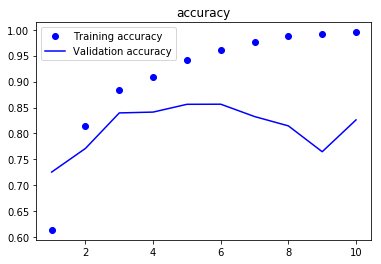

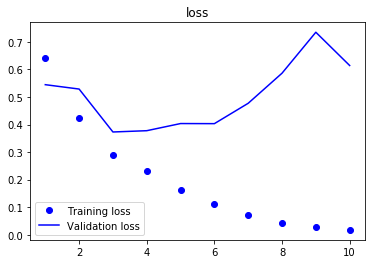

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoches = range(1, len(acc) + 1)
plt.plot(epoches, acc, 'bo', label='Training accuracy')
plt.plot(epoches, val_acc, 'b', label='Validation accuracy')
plt.title('accuracy')
plt.legend()

plt.figure()

plt.plot(epoches, loss, 'bo', label='Training loss')
plt.plot(epoches, val_loss, 'b', label='Validation loss')
plt.title('loss')
plt.legend()

plt.show()
